Post Exploratory Data Analysis of the Host-class-Device datastreams and Device classification

In [ ]:
#Import Libraries and Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import sys
import glob
import shutil
import time
import json
import ipaddress
import subprocess
import socket, struct
import seaborn as sns
from numpy import array
from random import random
from sklearn import svm
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from google.colab import files
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA


In [ ]:
import plotly.graph_objects as go

def plot_distribution(pd_series):
    labels = pd_series.value_counts().index.tolist()
    counts = pd_series.value_counts().values.tolist()
    
    pie_plot = go.Pie(labels=labels, values=counts, hole=.3)
    fig = go.Figure(data=[pie_plot])
    fig.update_layout(title_text='Distribution for %s' % pd_series.name)
    
    fig.show()

In [ ]:
pip install pySankey

In [ ]:
import pandas as pd
from pySankey import sankey


In [ ]:
pip install scikit-plot


In [ ]:
import scikitplot as skplt

In [ ]:
#Concatenate all .csv files
os.chdir("/content/drive/MyDrive/Master_Thesis/NetFlow_Data/NewConverted NetFlow/ConvertoutputAll")

extension = 'csv'
all_filenames = [i
   for i in glob.glob('*.{}'.format(extension))
]

#combine all files in the list
netflow1 = pd.concat([pd.read_csv(f) for f in all_filenames])
#export to csv
netflow1.to_csv("convertoutputalltemp.csv", index = False, encoding = 'utf-8-sig')

In [ ]:
# #Import NetFlow data
netflow= pd.read_csv('/content/nfcapd202109040450.csv', usecols=['td','sa','da','sp','dp','pr','ipkt','ibyt','opkt','obyt','stos','in','out'])
netflow1= pd.read_csv('/content/nfcapd202108050815.csv') 
netflow1hour= pd.read_csv('/content/nfcapd20211011212-13.csv', usecols=['td','sa','da','sp','dp','pr','ipkt','ibyt','opkt','obyt','stos','in','out'])
netflow_host= pd.read_csv('/content/Host-class-Devicestream.csv', usecols=['td','sa','da','sp','dp','pr','ipkt','ibyt','opkt','obyt','stos','in','out','Src_value', 'Dst_value','Device_Src','Device_Dst'])
netflow_unknown= pd.read_csv('/content/Unknown-Devicestream.csv', usecols=['td','sa','da','sp','dp','pr','ipkt','ibyt','opkt','obyt','stos','in','out','Src_value', 'Dst_value','Device_Src','Device_Dst'])
netflow_streams= pd.read_csv('/content/ALL-Devicestream.csv', usecols=['td','sa','da','sp','dp','pr','ipkt','ibyt','opkt','obyt','stos','in','out','Src_value', 'Dst_value','Device_Src','Device_Dst'])
netflow1hourstreams= pd.read_csv('/content/DataStream-netflow2021101212-13.csv', usecols=['td','sa','da','sp','dp','pr','ipkt','ibyt','opkt','obyt','stos','in','out','Src_value', 'Dst_value','Device_Src','Device_Dst'])

In [ ]:
netflow_host= pd.read_csv('/content/drive/MyDrive/Master_Thes')

In [ ]:
netflow.shape

(711539, 17)

In [ ]:
netflow.Device_Src.unique()

array(['Unknown_Device', 'Mikrotik-BGP-Router', 'Mikrotik-Radio',
       'Mikrotik-Router', 'SDR-RedPitaya', 'Linux-Raspbian',
       'Linux-Debian', 'VOIP', 'Linux-Ubuntu', 'Windows'], dtype=object)

In [ ]:
netflow_host= pd.read_csv('/content/NetFlow-Devicestreams.csv')


In [ ]:
netflow_unknown= pd.read_csv('/content/drive/MyDrive/Master_Thesis/NetFlow_Data/NetFlow Data All/NetFlow_UnknownStreams.csv')

In [ ]:
netflow_windows = netflow[netflow['Device_Src'] == 'Windows']

In [ ]:
netflow_windows.shape

(58363, 17)

In [ ]:
netflow_windows.to_csv('NetFlow-Windows.csv', index=False)

In [ ]:
netflow.Device_Src.unique()

array(['Mikrotik-BGP-Router', 'Mikrotik-Radio', 'Mikrotik-Router',
       'SDR-RedPitaya', 'Linux-Raspbian', 'Linux-Debian', 'VOIP',
       'Linux-Ubuntu', 'Windows'], dtype=object)

In [ ]:
netflow_unknown.to_csv('NetFlow_UnknownStreams.csv', index= False)

In [ ]:
netflow_Mikrotik-BGP = netflow[netflow['Device_Src'] == 'Mikrotik-BGP-Router']

In [ ]:
netflow_host.shape

(711539, 17)

In [ ]:
netflow_host.to_csv('NetFlow_HostDevicesStreams.csv', index= False)

In [ ]:
netflow_linux.head(10)

,sp,dp,pr,td,ipkt,ibyt,opkt,obyt,stos,in,out,Src_value,Dst_value,Device_Src
3625,37156,123,UDP,0.0,1,76,1,104,16,6,3,Unassigned,Network Time Protocol (NTP),Linux-Debian
3626,123,123,UDP,0.0,1,76,1,76,192,6,3,Network Time Protocol (NTP),Network Time Protocol (NTP),Linux-Debian
3627,123,123,UDP,0.0,1,76,1,76,192,6,3,Network Time Protocol (NTP),Network Time Protocol (NTP),Linux-Debian
3628,123,123,UDP,0.0,1,76,1,76,192,6,3,Network Time Protocol (NTP),Network Time Protocol (NTP),Linux-Debian
3629,123,123,UDP,0.0,1,76,1,76,192,6,3,Network Time Protocol (NTP),Network Time Protocol (NTP),Linux-Debian
3630,123,123,UDP,0.0,1,76,1,76,192,6,3,Network Time Protocol (NTP),Network Time Protocol (NTP),Linux-Debian
3631,123,123,UDP,0.0,1,76,1,76,192,6,3,Network Time Protocol (NTP),Network Time Protocol (NTP),Linux-Debian
3632,123,123,UDP,0.0,1,76,1,76,192,6,3,Network Time Protocol (NTP),Network Time Protocol (NTP),Linux-Debian
3633,123,123,UDP,0.0,1,76,1,76,192,6,3,Network Time Protocol (NTP),Network Time Protocol (NTP),Linux-Debian
3634,55312,80,TCP,0.0,1,60,1,88,0,6,3,Unassigned,Hypertext Transfer Protocol (HTTP),Linux-Debian


In [ ]:
csvtrial1 = pd.read_csv('/content/csvtrial.csv')
csvtrial2 = pd.read_csv('/content/csv2.csv')
csvtrial3 = pd.read_csv('/content/csv3.csv')
csvtrial4 = pd.read_csv('/content/csv4.csv')
csvtrial5 = pd.read_csv('/content/csv5.csv')
csvtrial6 = pd.read_csv('/content/csv6.csv')

In [ ]:
netflow = pd.concat([netflow_data1,netflow_data2,netflow_data3,netflow_data4,netflow_data5,netflow_data6,netflow_data7,netflow_data8,netflow_data9,netflow_data10,netflow_data11,netflow_data12,],ignore_index=True)

In [ ]:
nfdumpfilenames = pd.concat([csvtrial1,csvtrial2,csvtrial3,csvtrial4,csvtrial5,csvtrial6],ignore_index=True)

In [ ]:
nfdumpfilenames.to_csv('nfdumpfilenames.csv',index=True)

In [ ]:
filename = pd.read_csv('/content/nfdumpfilenames.csv')

In [ ]:
filename = filename['nfdumpcsv']

In [ ]:
filename.to_csv('nfcapdfilename.csv', index=False)

In [ ]:
print(netflow1.shape)
print(netflow2.shape)
print(netflow3.shape)
print(netflow5.shape)

(888, 48)
(2854, 48)
(2630, 48)
(3064, 48)


In [ ]:
netflow_host.dtypes

sa             object
da             object
sp              int64
dp              int64
pr             object
td            float64
ipkt          float64
ibyt          float64
opkt          float64
obyt          float64
stos          float64
in            float64
out           float64
Src_value      object
Dst_value      object
Device_Src     object
Device_Dst     object
dtype: object

In [ ]:
netflow_host.Device_Src.value_counts()

Linux-Ubuntu           254414
Mikrotik-BGP-Router    120076
Linux-Raspbian         112904
SDR-RedPitaya           64363
Linux-Debian            59028
Windows                 58363
Mikrotik-Router         25923
Mikrotik-Radio           8969
VOIP                     7499
Name: Device_Src, dtype: int64

In [ ]:
netflow_host.sa.nunique()

24

In [ ]:
netflow_host.sa.value_counts()

44.149.43.209    159660
44.149.43.193    112881
44.149.43.198    107120
44.149.43.210     58363
44.149.43.132     54706
44.149.43.199     50473
44.149.43.207     28272
44.149.43.206     22478
44.149.43.202     22458
44.149.43.196      8607
44.149.43.197      8586
44.149.43.208      8555
44.149.43.211      8531
44.149.43.203      7499
44.149.43.129      7195
44.149.43.204      6978
44.149.43.200      6585
44.149.43.134      5784
44.149.43.131      5651
44.149.43.130      5080
44.149.43.136      4798
44.149.43.195      4491
44.149.43.194      4478
44.149.43.213      2310
Name: sa, dtype: int64

In [ ]:
class_A_IP = ['44.149.43.193','44.149.43.196','44.149.43.131','44.149.43.132','44.149.43.204','44.149.43.209', '44.149.43.198','44.149.43.195','44.149.43.197','44.149.43.202','44.149.43.213','44.149.43.199']

In [ ]:
class_A = netflow_host[netflow_host.sa.isin(class_A_IP)]
class_A

,sa,da,sp,dp,pr,td,ipkt,ibyt,opkt,obyt,stos,in,out,Src_value,Dst_value,Device_Src,Device_Dst
12275,44.149.43.131,255.255.255.255,5678,5678,UDP,0.0,5.0,815.0,0.0,0.0,0.0,6.0,0.0,Port used by Linksys (and other) Cable/DSL Rou...,Port used by Linksys (and other) Cable/DSL Rou...,Mikrotik-Router,Unknown_Device
12276,44.149.43.131,255.255.255.255,5678,5678,UDP,0.0,5.0,815.0,0.0,0.0,0.0,6.0,0.0,Port used by Linksys (and other) Cable/DSL Rou...,Port used by Linksys (and other) Cable/DSL Rou...,Mikrotik-Router,Unknown_Device
12277,44.149.43.131,255.255.255.255,5678,5678,UDP,0.0,5.0,815.0,0.0,0.0,0.0,6.0,0.0,Port used by Linksys (and other) Cable/DSL Rou...,Port used by Linksys (and other) Cable/DSL Rou...,Mikrotik-Router,Unknown_Device
12278,44.149.43.131,255.255.255.255,5678,5678,UDP,0.0,5.0,815.0,0.0,0.0,0.0,6.0,0.0,Port used by Linksys (and other) Cable/DSL Rou...,Port used by Linksys (and other) Cable/DSL Rou...,Mikrotik-Router,Unknown_Device
12279,44.149.43.131,255.255.255.255,5678,5678,UDP,0.0,5.0,815.0,0.0,0.0,0.0,6.0,0.0,Port used by Linksys (and other) Cable/DSL Rou...,Port used by Linksys (and other) Cable/DSL Rou...,Mikrotik-Router,Unknown_Device
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711534,44.149.43.213,44.149.43.22,0,0,ICMP,0.0,5.0,260.0,5.0,260.0,0.0,6.0,3.0,In programming APIs- requests a system-allocat...,In programming APIs- requests a system-allocat...,SDR-RedPitaya,Unknown_Device
711535,44.149.43.213,44.149.43.22,0,0,ICMP,0.0,5.0,260.0,5.0,260.0,0.0,6.0,3.0,In programming APIs- requests a system-allocat...,In programming APIs- requests a system-allocat...,SDR-RedPitaya,Unknown_Device
711536,44.149.43.213,44.149.43.22,0,0,ICMP,0.0,5.0,260.0,5.0,260.0,0.0,6.0,3.0,In programming APIs- requests a system-allocat...,In programming APIs- requests a system-allocat...,SDR-RedPitaya,Unknown_Device
711537,44.149.43.213,44.149.43.22,0,0,ICMP,0.0,5.0,260.0,5.0,260.0,0.0,6.0,3.0,In programming APIs- requests a system-allocat...,In programming APIs- requests a system-allocat...,SDR-RedPitaya,Unknown_Device


In [ ]:
class_A.shape

(543921, 17)

In [ ]:
class_A.Device_Src.unique()

array(['Mikrotik-Router', 'Linux-Ubuntu', 'Mikrotik-BGP-Router',
       'Mikrotik-Radio', 'SDR-RedPitaya', 'Linux-Raspbian',
       'Linux-Debian'], dtype=object)

In [ ]:
class_A.Device_Src.value_counts()

Linux-Ubuntu           221344
Mikrotik-BGP-Router    112881
Linux-Raspbian         107120
Linux-Debian            50473
SDR-RedPitaya           33354
Mikrotik-Router         14258
Mikrotik-Radio           4491
Name: Device_Src, dtype: int64

In [ ]:
Src_Ip_Sorted = class_A.sort_values(by=['sa','da'])
Src_Ip_Sorted.to_csv('Src_Ip_Sorted.csv', index=False)
Src_Ip_Sorted.shape


(586317, 17)

In [ ]:
Src_Ip_Sorted3 = class_C.sort_values(by=['sa','da'])
Src_Ip_Sorted3.to_csv('Class_C_Devicestreams.csv', index=False)
Src_Ip_Sorted3.shape

(652179, 17)

In [ ]:
Src_Ip_Sorted.head

<bound method GroupBy.head of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7efebedb37d0>>

In [ ]:
class_A.to_csv('Class_A_Datastreams.csv', index=False)

In [ ]:
class_B_IP = ['44.149.43.129','44.149.43.200','44.149.43.130','44.149.43.136','44.149.43.207','44.149.43.134', '44.149.43.194','44.149.43.206','44.149.43.211','44.149.43.208']

In [ ]:
class_B = netflow_host[netflow_host.sa.isin(class_B_IP)]
class_B

,sa,da,sp,dp,pr,td,ipkt,ibyt,opkt,obyt,stos,in,out,Src_value,Dst_value,Device_Src,Device_Dst
0,44.149.43.129,44.148.230.161,8728,41242,TCP,1.10,24.0,5239.0,18.0,1087.0,0.0,0.0,4.0,Unassigned,Unassigned,Mikrotik-BGP-Router,Unknown_Device
1,44.149.43.129,44.148.230.161,8728,40182,TCP,1.01,24.0,5244.0,19.0,1139.0,0.0,0.0,4.0,Unassigned,Unassigned,Mikrotik-BGP-Router,Unknown_Device
2,44.149.43.129,44.148.230.161,8728,39596,TCP,2.35,24.0,5244.0,18.0,1087.0,0.0,0.0,4.0,Unassigned,Unassigned,Mikrotik-BGP-Router,Unknown_Device
3,44.149.43.129,44.148.230.161,8728,38992,TCP,3.67,24.0,5244.0,18.0,1087.0,0.0,0.0,4.0,Unassigned,Unassigned,Mikrotik-BGP-Router,Unknown_Device
4,44.149.43.129,44.148.230.161,8728,38316,TCP,1.01,24.0,5242.0,19.0,1139.0,0.0,0.0,4.0,Unassigned,Unassigned,Mikrotik-BGP-Router,Unknown_Device
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709224,44.149.43.211,94.23.160.14,55222,123,UDP,0.00,1.0,76.0,1.0,104.0,0.0,6.0,3.0,Unassigned,Network Time Protocol (NTP),SDR-RedPitaya,Unknown_Device
709225,44.149.43.211,94.23.160.14,34197,123,UDP,0.00,1.0,76.0,1.0,104.0,0.0,6.0,3.0,"Factorio, a multiplayer survival and factory-b...",Network Time Protocol (NTP),SDR-RedPitaya,Unknown_Device
709226,44.149.43.211,94.23.160.14,49048,123,UDP,0.00,1.0,76.0,1.0,104.0,0.0,6.0,3.0,Unassigned,Network Time Protocol (NTP),SDR-RedPitaya,Unknown_Device
709227,44.149.43.211,94.23.160.14,43179,123,UDP,0.00,1.0,76.0,1.0,104.0,0.0,6.0,3.0,Unassigned,Network Time Protocol (NTP),SDR-RedPitaya,Unknown_Device


In [ ]:
class_B.shape

(101756, 17)

In [ ]:
class_A.Device_Src.value_counts()

Linux-Ubuntu           221344
Mikrotik-BGP-Router    112881
Linux-Raspbian         107120
Linux-Debian            50473
SDR-RedPitaya           33354
Mikrotik-Router         14258
Mikrotik-Radio           4491
Name: Device_Src, dtype: int64

In [ ]:
class_B.Device_Src.value_counts()

Linux-Ubuntu           33070
SDR-RedPitaya          31009
Mikrotik-Router        11665
Linux-Debian            8555
Mikrotik-BGP-Router     7195
Linux-Raspbian          5784
Mikrotik-Radio          4478
Name: Device_Src, dtype: int64

In [ ]:
class_A.sa.value_counts()

44.149.43.209    159660
44.149.43.193    112881
44.149.43.198    107120
44.149.43.132     54706
44.149.43.199     50473
44.149.43.202     22458
44.149.43.196      8607
44.149.43.197      8586
44.149.43.204      6978
44.149.43.131      5651
44.149.43.195      4491
44.149.43.213      2310
Name: sa, dtype: int64

In [ ]:
class_B.sa.value_counts()

44.149.43.207    28272
44.149.43.206    22478
44.149.43.208     8555
44.149.43.211     8531
44.149.43.129     7195
44.149.43.200     6585
44.149.43.134     5784
44.149.43.130     5080
44.149.43.136     4798
44.149.43.194     4478
Name: sa, dtype: int64

In [ ]:
class_B.to_csv('Class_B_Datastreams.csv', index=False)

In [ ]:
class_C_IP = ['44.149.43.193','44.149.43.196','44.149.43.131','44.149.43.132','44.149.43.204','44.149.43.209', '44.149.43.198','44.149.43.195','44.149.43.197','44.149.43.202','44.149.43.213','44.149.43.199','44.149.43.203','44.149.43.210']

In [ ]:
class_C = netflow_host[netflow_host.sa.isin(class_C_IP)]
class_C

,sa,da,sp,dp,pr,td,ipkt,ibyt,opkt,obyt,stos,in,out,Src_value,Dst_value,Device_Src,Device_Dst
12275,44.149.43.131,255.255.255.255,5678,5678,UDP,0.0,5.0,815.0,0.0,0.0,0.0,6.0,0.0,Port used by Linksys (and other) Cable/DSL Rou...,Port used by Linksys (and other) Cable/DSL Rou...,Mikrotik-Router,Unknown_Device
12276,44.149.43.131,255.255.255.255,5678,5678,UDP,0.0,5.0,815.0,0.0,0.0,0.0,6.0,0.0,Port used by Linksys (and other) Cable/DSL Rou...,Port used by Linksys (and other) Cable/DSL Rou...,Mikrotik-Router,Unknown_Device
12277,44.149.43.131,255.255.255.255,5678,5678,UDP,0.0,5.0,815.0,0.0,0.0,0.0,6.0,0.0,Port used by Linksys (and other) Cable/DSL Rou...,Port used by Linksys (and other) Cable/DSL Rou...,Mikrotik-Router,Unknown_Device
12278,44.149.43.131,255.255.255.255,5678,5678,UDP,0.0,5.0,815.0,0.0,0.0,0.0,6.0,0.0,Port used by Linksys (and other) Cable/DSL Rou...,Port used by Linksys (and other) Cable/DSL Rou...,Mikrotik-Router,Unknown_Device
12279,44.149.43.131,255.255.255.255,5678,5678,UDP,0.0,5.0,815.0,0.0,0.0,0.0,6.0,0.0,Port used by Linksys (and other) Cable/DSL Rou...,Port used by Linksys (and other) Cable/DSL Rou...,Mikrotik-Router,Unknown_Device
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711534,44.149.43.213,44.149.43.22,0,0,ICMP,0.0,5.0,260.0,5.0,260.0,0.0,6.0,3.0,In programming APIs- requests a system-allocat...,In programming APIs- requests a system-allocat...,SDR-RedPitaya,Unknown_Device
711535,44.149.43.213,44.149.43.22,0,0,ICMP,0.0,5.0,260.0,5.0,260.0,0.0,6.0,3.0,In programming APIs- requests a system-allocat...,In programming APIs- requests a system-allocat...,SDR-RedPitaya,Unknown_Device
711536,44.149.43.213,44.149.43.22,0,0,ICMP,0.0,5.0,260.0,5.0,260.0,0.0,6.0,3.0,In programming APIs- requests a system-allocat...,In programming APIs- requests a system-allocat...,SDR-RedPitaya,Unknown_Device
711537,44.149.43.213,44.149.43.22,0,0,ICMP,0.0,5.0,260.0,5.0,260.0,0.0,6.0,3.0,In programming APIs- requests a system-allocat...,In programming APIs- requests a system-allocat...,SDR-RedPitaya,Unknown_Device


In [ ]:
class_C.shape

(609783, 17)

In [ ]:
class_C.to_csv('Class_C_Datastream.csv', index= False)


In [ ]:
netflow['stos'] = netflow.stos.astype(float)
netflow['td'] = netflow.td.astype(float)
netflow['ipkt'] = netflow.ipkt.astype(float)
netflow['ibyt'] = netflow.ibyt.astype(float)
netflow['opkt'] = netflow.opkt.astype(float)
netflow['obyt'] = netflow.obyt.astype(float)
netflow['in'] = netflow['in'].astype(float)
netflow['out'] = netflow.out.astype(float)

In [ ]:
netflow['dp'] = netflow.dp.astype(int)

In [ ]:
netflow.dtypes

sa       object
da       object
sp        int64
dp        int64
pr       object
td      float64
ipkt    float64
ibyt    float64
opkt    float64
obyt    float64
stos    float64
in      float64
out     float64
dtype: object

In [ ]:
netflow.head(11)

,sa,da,sp,dp,pr,td,ipkt,ibyt,opkt,obyt,stos,in,out
0,13.107.4.50,44.149.43.210,80,54313,TCP,15.02,5.0,400.0,5.0,260.0,192.0,3.0,6.0
1,158.247.7.204,44.149.43.199,8245,51266,TCP,0.00,1.0,88.0,1.0,60.0,192.0,3.0,6.0
2,159.148.147.201,44.149.43.200,15252,45472,UDP,5.00,2.0,188.0,2.0,132.0,192.0,3.0,6.0
3,159.148.172.251,44.149.43.200,15252,33712,UDP,5.00,2.0,188.0,2.0,132.0,192.0,3.0,6.0
4,168.235.104.115,44.149.43.199,80,46048,TCP,0.00,1.0,88.0,1.0,60.0,192.0,3.0,6.0
5,168.235.104.115,44.149.43.199,80,46056,TCP,0.00,1.0,88.0,1.0,60.0,192.0,3.0,6.0
6,168.235.104.115,44.149.43.199,80,46058,TCP,0.00,1.0,88.0,1.0,60.0,192.0,3.0,6.0
7,168.235.104.115,44.149.43.199,80,46064,TCP,0.00,1.0,88.0,1.0,60.0,192.0,3.0,6.0
8,168.235.104.115,44.149.43.199,80,46066,TCP,0.00,1.0,88.0,1.0,60.0,192.0,3.0,6.0
9,185.199.108.153,44.149.43.199,443,57336,TCP,0.00,1.0,88.0,1.0,60.0,192.0,3.0,6.0


In [ ]:
netflow_host.head(10)

,sa,da,sp,dp,pr,td,ipkt,ibyt,opkt,obyt,stos,in,out,Src_value,Dst_value,Device_Src,Device_Dst
0,4414943129,4.414824e+08,0,0,ICMP,14.82,2,168,2,168,0,0,5,In programming APIs- requests a system-allocat...,In programming APIs- requests a system-allocat...,Mikrotik-BGP-Router,NaN
1,4414943129,4.414824e+08,0,0,ICMP,14.81,2,168,2,168,0,0,5,In programming APIs- requests a system-allocat...,In programming APIs- requests a system-allocat...,Mikrotik-BGP-Router,NaN
2,4414943129,4.414824e+08,0,0,ICMP,14.56,2,168,2,168,0,0,5,In programming APIs- requests a system-allocat...,In programming APIs- requests a system-allocat...,Mikrotik-BGP-Router,NaN
3,4414943129,4.414824e+08,0,0,ICMP,14.61,2,168,2,168,0,0,5,In programming APIs- requests a system-allocat...,In programming APIs- requests a system-allocat...,Mikrotik-BGP-Router,NaN
4,4414943129,4.414824e+08,0,0,ICMP,14.61,2,168,2,168,0,0,5,In programming APIs- requests a system-allocat...,In programming APIs- requests a system-allocat...,Mikrotik-BGP-Router,NaN
5,4414943129,4.414824e+08,0,0,ICMP,14.80,2,168,2,168,0,0,5,In programming APIs- requests a system-allocat...,In programming APIs- requests a system-allocat...,Mikrotik-BGP-Router,NaN
6,4414943129,4.414943e+09,0,0,GRE,258.24,133,27869,0,0,0,0,6,In programming APIs- requests a system-allocat...,In programming APIs- requests a system-allocat...,Mikrotik-BGP-Router,Mikrotik-Router
7,4414943129,4.414943e+09,0,0,GRE,156.99,96,16705,2155,262558,0,0,6,In programming APIs- requests a system-allocat...,In programming APIs- requests a system-allocat...,Mikrotik-BGP-Router,Mikrotik-Router
8,4414943129,4.414943e+09,0,0,GRE,208.26,108,17630,0,0,0,0,6,In programming APIs- requests a system-allocat...,In programming APIs- requests a system-allocat...,Mikrotik-BGP-Router,Mikrotik-Router
9,4414943129,4.414943e+09,0,0,GRE,369.24,153,21402,0,0,192,0,6,In programming APIs- requests a system-allocat...,In programming APIs- requests a system-allocat...,Mikrotik-BGP-Router,Mikrotik-Router


In [ ]:
netflow.count()

ts      2767
te      2767
td      2767
sa      2767
da      2767
sp      2767
dp      2767
pr      2767
stos    2767
ipkt    2767
ibyt    2767
opkt    2767
obyt    2767
in      2767
out     2767
dtype: int64

In [ ]:
netflow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2767 entries, 0 to 2766
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ts      2767 non-null   object 
 1   te      2767 non-null   object 
 2   td      2767 non-null   float64
 3   sa      2767 non-null   object 
 4   da      2767 non-null   object 
 5   sp      2767 non-null   int64  
 6   dp      2767 non-null   int64  
 7   pr      2767 non-null   object 
 8   stos    2767 non-null   int64  
 9   ipkt    2767 non-null   int64  
 10  ibyt    2767 non-null   int64  
 11  opkt    2767 non-null   int64  
 12  obyt    2767 non-null   int64  
 13  in      2767 non-null   int64  
 14  out     2767 non-null   int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 324.4+ KB


In [ ]:
netflow1hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24223 entries, 0 to 24222
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   td      24223 non-null  float64
 1   sa      24223 non-null  object 
 2   da      24223 non-null  object 
 3   sp      24223 non-null  int64  
 4   dp      24223 non-null  int64  
 5   pr      24223 non-null  object 
 6   stos    24223 non-null  int64  
 7   ipkt    24223 non-null  int64  
 8   ibyt    24223 non-null  int64  
 9   opkt    24223 non-null  int64  
 10  obyt    24223 non-null  int64  
 11  in      24223 non-null  int64  
 12  out     24223 non-null  int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 2.4+ MB


In [ ]:
netflow.describe()

,td,sp,dp,stos,ipkt,ibyt,opkt,obyt,in,out
count,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.0,2767.0,2767.000000,2767.000000
mean,6.658045,14474.720275,13510.590893,19.825081,6.190459,1699.226599,0.0,0.0,4.101554,3.343332
std,70.550092,20077.398636,19353.462064,57.041939,30.256189,21272.384935,0.0,0.0,2.763677,2.064736
min,0.000000,0.000000,0.000000,0.000000,1.000000,32.000000,0.0,0.0,0.000000,0.000000
25%,0.000000,22.000000,22.000000,0.000000,1.000000,52.000000,0.0,0.0,3.000000,2.000000
50%,0.000000,4520.000000,4520.000000,0.000000,1.000000,76.000000,0.0,0.0,4.000000,3.000000
75%,0.000000,36364.000000,14580.000000,0.000000,3.500000,260.000000,0.0,0.0,5.000000,4.000000
max,1798.950000,64903.000000,64903.000000,192.000000,1050.000000,944424.000000,0.0,0.0,14.000000,13.000000


In [ ]:
netflow1hour.describe()

,td,sp,dp,stos,ipkt,ibyt,opkt,obyt,in,out
count,24223.000000,24223.000000,24223.000000,24223.000000,24223.000000,2.422300e+04,24223.0,24223.0,24223.000000,24223.000000
mean,10.380872,10784.812286,10448.434215,28.568055,11.751022,2.638527e+03,0.0,0.0,4.448293,3.609421
std,108.995176,18137.919152,17828.656034,66.970752,217.919711,7.214243e+04,0.0,0.0,3.116785,2.383749
min,0.000000,0.000000,0.000000,0.000000,1.000000,3.200000e+01,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,5.200000e+01,0.0,0.0,3.000000,3.000000
50%,0.000000,1984.000000,1984.000000,0.000000,1.000000,1.280000e+02,0.0,0.0,4.000000,3.000000
75%,0.000000,5678.000000,5678.000000,0.000000,3.000000,3.200000e+02,0.0,0.0,6.000000,6.000000
max,1799.990000,65492.000000,65492.000000,254.000000,16853.000000,8.110194e+06,0.0,0.0,14.000000,13.000000


In [ ]:
print(netflow.sp.nunique())
print(netflow1.sp.nunique())
print(netflow2.sp.nunique())
print(netflow3.sp.nunique())
print(netflow1hour.sp.nunique())

621
263
654
562
2432


In [ ]:
print(netflow.dp.nunique())
print(netflow1.dp.nunique())
print(netflow2.dp.nunique())
print(netflow3.dp.nunique())
print(netflow1hour.dp.nunique())

579
261
638
564
2339


Text(0, 0.5, 'Info')

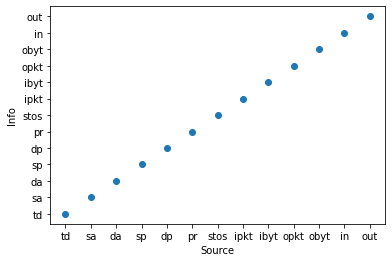

In [ ]:
plt.scatter(netflow1hour.columns,netflow1hour.columns)
plt.xlabel('Source')
plt.ylabel('Info')

In [ ]:
netflow1hour.pr.unique()

array(['UDP', 'TCP', 'ICMP', 'IPIP', 'GRE'], dtype=object)

In [ ]:
netflow_corr_matrix =netflow_host.corr()
netflow_corr_matrix

,sa,da,sp,dp,td,ipkt,ibyt,opkt,obyt,stos,in,out
sa,1.000000,-0.049091,0.394051,-0.084253,-0.252095,-0.241944,-0.030620,-0.092138,-0.011377,-0.084680,-0.031119,-0.134711
da,-0.049091,1.000000,-0.012736,-0.105401,-0.024870,-0.038099,-0.069332,-0.041615,-0.011545,-0.040808,0.076544,-0.171769
sp,0.394051,-0.012736,1.000000,-0.593532,-0.084851,-0.122074,-0.126196,-0.087069,-0.054323,-0.174519,0.451910,-0.396052
dp,-0.084253,-0.105401,-0.593532,1.000000,-0.038869,0.012421,0.204007,0.061950,0.031329,-0.044296,-0.653870,0.539694
td,-0.252095,-0.024870,-0.084851,-0.038869,1.000000,0.897399,0.119379,0.307004,0.123833,-0.007892,0.221001,-0.051187
ipkt,-0.241944,-0.038099,-0.122074,0.012421,0.897399,1.000000,0.377084,0.335245,0.177007,-0.014674,0.224365,-0.052406
ibyt,-0.030620,-0.069332,-0.126196,0.204007,0.119379,0.377084,1.000000,0.319935,0.251966,-0.035745,0.120652,-0.009783
opkt,-0.092138,-0.041615,-0.087069,0.061950,0.307004,0.335245,0.319935,1.000000,0.645430,-0.012712,0.071045,0.004866
obyt,-0.011377,-0.011545,-0.054323,0.031329,0.123833,0.177007,0.251966,0.645430,1.000000,-0.001594,0.048113,0.015336
stos,-0.084680,-0.040808,-0.174519,-0.044296,-0.007892,-0.014674,-0.035745,-0.012712,-0.001594,1.000000,-0.029870,-0.053317


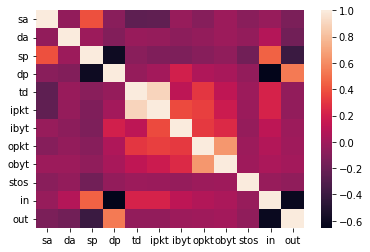

In [ ]:
sns.heatmap(netflow_corr_matrix)

In [ ]:
print(netflow1.info())
print(netflow.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2088 entries, 0 to 2087
Data columns (total 48 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ts      2088 non-null   object 
 1   te      2088 non-null   object 
 2   td      2088 non-null   float64
 3   sa      2088 non-null   object 
 4   da      2088 non-null   object 
 5   sp      2088 non-null   int64  
 6   dp      2088 non-null   int64  
 7   pr      2088 non-null   object 
 8   flg     2088 non-null   object 
 9   fwd     2088 non-null   int64  
 10  stos    2088 non-null   int64  
 11  ipkt    2088 non-null   int64  
 12  ibyt    2088 non-null   int64  
 13  opkt    2088 non-null   int64  
 14  obyt    2088 non-null   int64  
 15  in      2088 non-null   int64  
 16  out     2088 non-null   int64  
 17  sas     2088 non-null   int64  
 18  das     2088 non-null   int64  
 19  smk     2088 non-null   int64  
 20  dmk     2088 non-null   int64  
 21  dtos    2088 non-null   int64  
 22  

In [ ]:
netflow_streams.sp.value_counts()

0        3943
53       1414
123      1328
8080     1301
81       1296
         ... 
51153       1
36824       1
40922       1
57314       1
53246       1
Name: sp, Length: 7937, dtype: int64

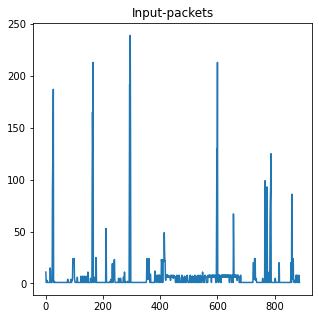

In [ ]:
plt.figure(figsize=(5,5))
plt.title("Input-packets")
plt.plot(netflow1['ipkt'])
# plt.figure(figsize=(10,5))
# plt.title("Input-bytes")
# plt.plot(netflow1hour['ibyt'])

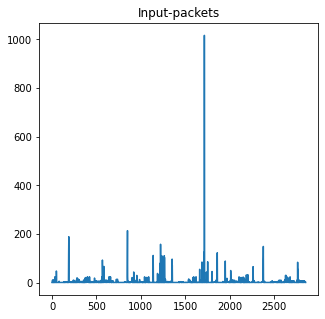

In [ ]:
plt.figure(figsize=(5,5))
plt.title("Input-packets")
plt.plot(netflow2['ipkt'])

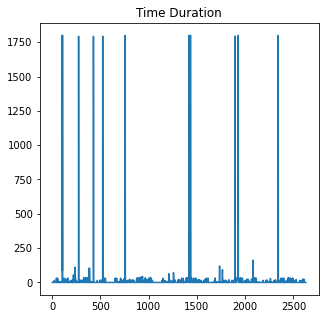

In [ ]:
plt.figure(figsize=(5,5))
plt.title("Time Duration")
plt.plot(netflow3['td'])

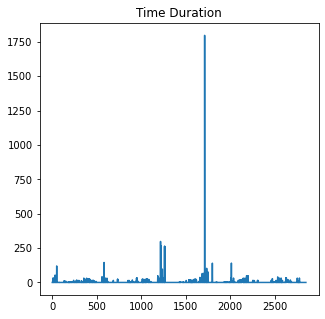

In [ ]:
plt.figure(figsize=(5,5))
plt.title("Time Duration")
plt.plot(netflow2['td'])

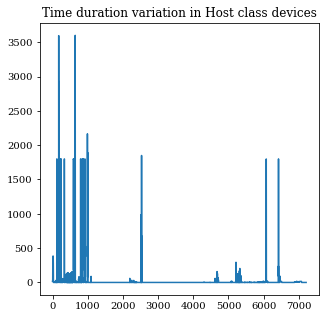

In [ ]:
plt.figure(figsize=(5,5))
plt.title("Time duration variation in Host class devices")
plt.plot(netflow_host['td'])

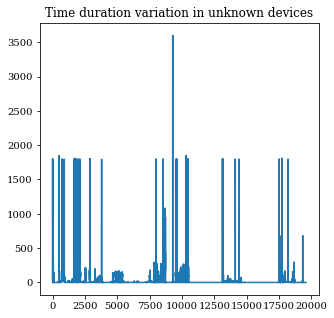

In [ ]:
plt.figure(figsize=(5,5))
plt.title("Time duration variation in unknown devices")
plt.plot(netflow_unknown['td'])

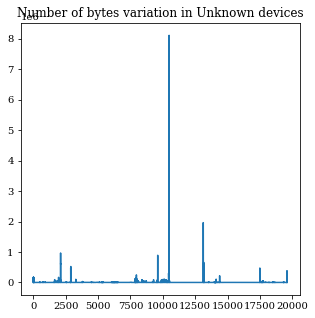

In [ ]:
plt.figure(figsize=(5,5))
plt.title("Number of bytes variation in Unknown devices")
plt.plot(netflow_unknown['ibyt'])

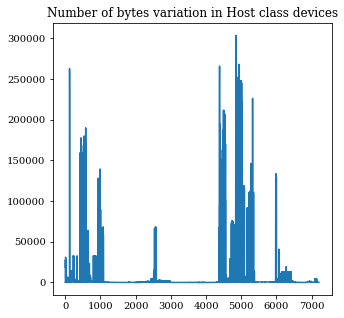

In [ ]:
plt.figure(figsize=(5,5))
plt.title("Number of bytes variation in Host class devices")
plt.plot(netflow_host['ibyt'])

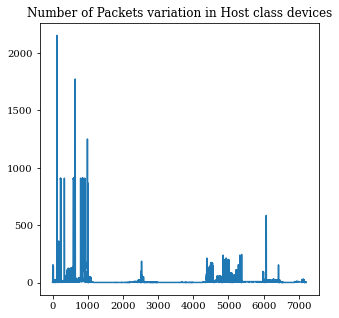

In [ ]:
plt.figure(figsize=(5,5))
plt.title("Number of Packets variation in Host class devices")
plt.plot(netflow_host['ipkt'])

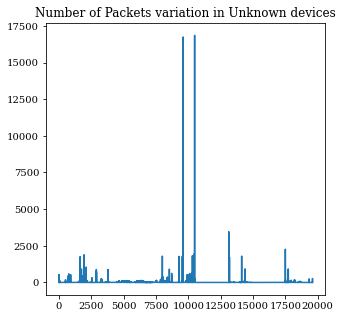

In [ ]:
plt.figure(figsize=(5,5))
plt.title("Number of Packets variation in Unknown devices")
plt.plot(netflow_unknown['ipkt'])

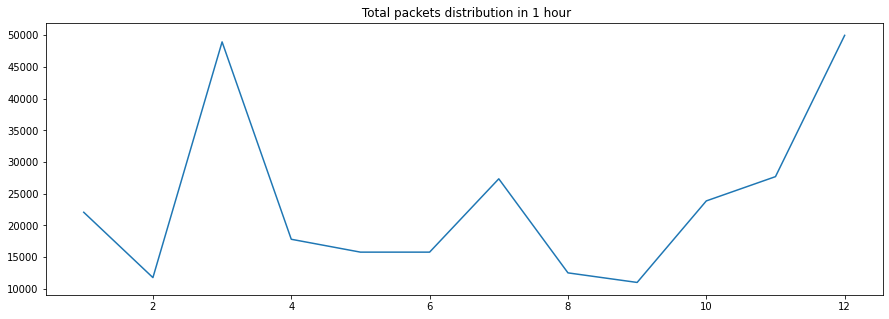

In [ ]:
plt.figure(figsize=(15,5))
plt.title(" Total packets distribution in 1 hour")
plt.plot(netflowtotalpackets['flowcount'],netflowtotalpackets['Total packets'])

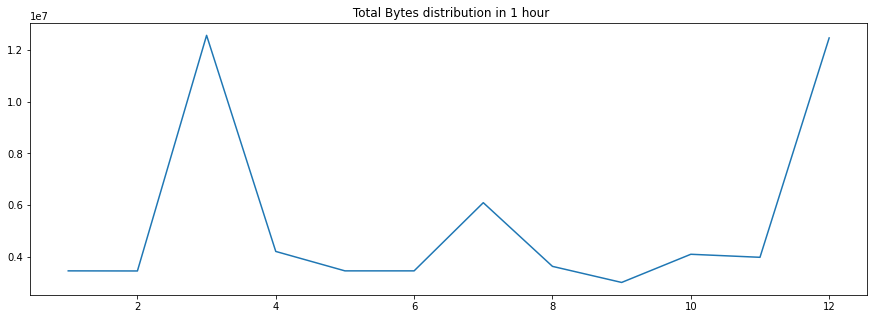

In [ ]:
plt.figure(figsize=(15,5))
plt.title(" Total Bytes distribution in 1 hour")
plt.plot(netflowtotalpackets['flowcount'],netflowtotalpackets['Total Bytes'])

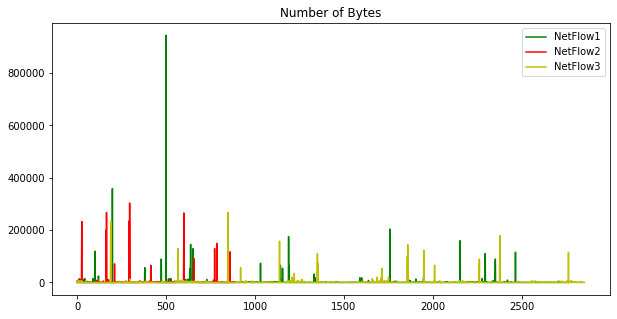

In [ ]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)
plt.title("Number of Bytes")
ax1.plot(netflow['ibyt'], c='g',label='NetFlow1')
ax1.plot(netflow1['ibyt'], c='r',label='NetFlow2')
ax1.plot(netflow2['ibyt'], c='y',label='NetFlow3')
plt.legend(loc='upper right');
plt.show()

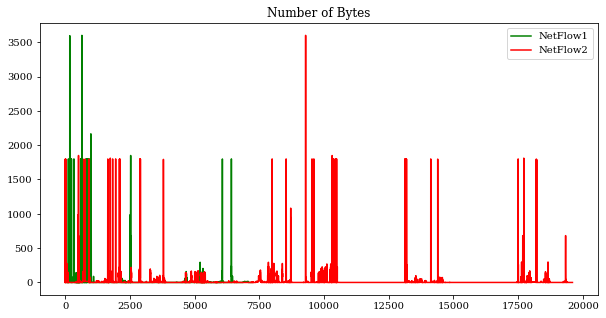

In [ ]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)
plt.title("Number of Bytes")
ax1.plot(netflow_host['td'], c='g',label='NetFlow1')
ax1.plot(netflow_unknown['td'], c='r',label='NetFlow2')
plt.legend(loc='upper right');
plt.show()

Text(0, 0.5, 'Info')

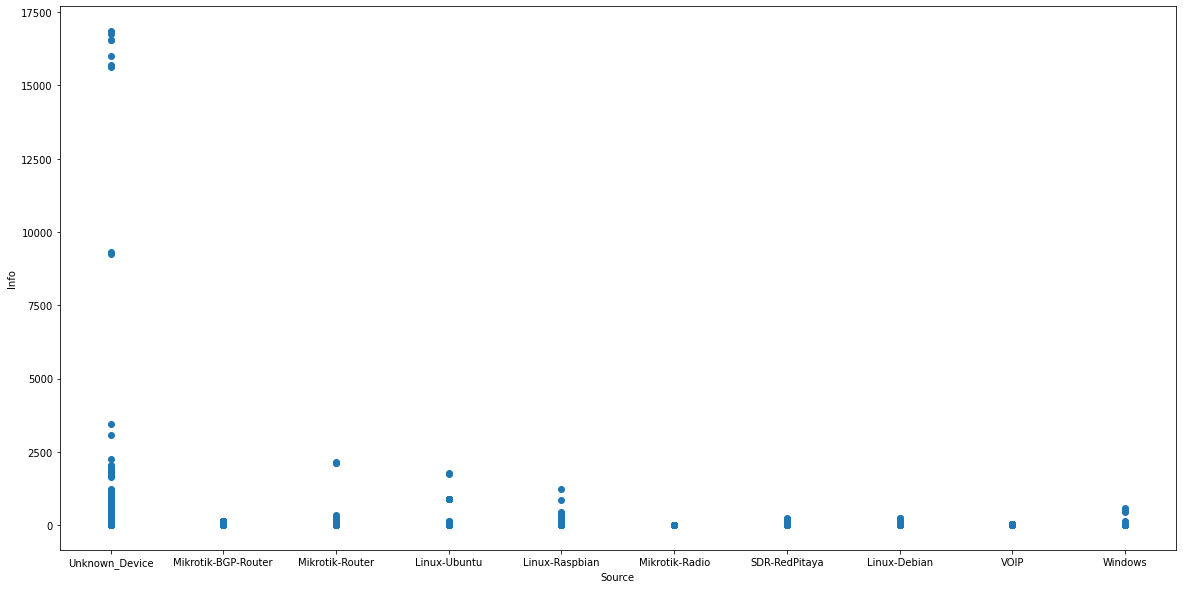

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.scatter(netflow_streams['Device_Src'],netflow_streams['ipkt'])
plt.xlabel('Source')
plt.ylabel('Info')

In [ ]:
plot_distribution(netflow_host['Device_Src'])

In [ ]:
plot_distribution(netflow_host['Device_Src'])

In [ ]:
plot_distribution(netflow_host['pr'])

In [ ]:
plot_distribution(netflow_unknown['pr'])

In [ ]:
netflow_host.sp.nunique()

32725

In [ ]:
netflow_host.dp.nunique()

31428

In [ ]:
netflow_unknown.sp.nunique()

42838

In [ ]:
netflow_unknown.dp.nunique()

45952

In [ ]:
plot_distribution(netflow_host['Src_value'])

In [ ]:
plot_distribution(netflow_host['Dst_value'])

In [ ]:
plot_distribution(netflow_unknown['Src_value'])

In [ ]:
plot_distribution(netflow_unknown['Dst_value'])

In [ ]:
netflow_host.ipkt.sum()

156732

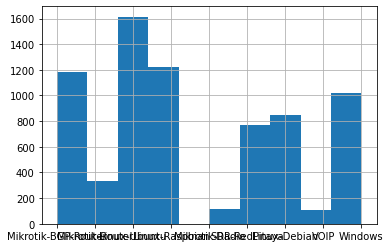

In [ ]:
netflow_host['Device_Src'].hist()

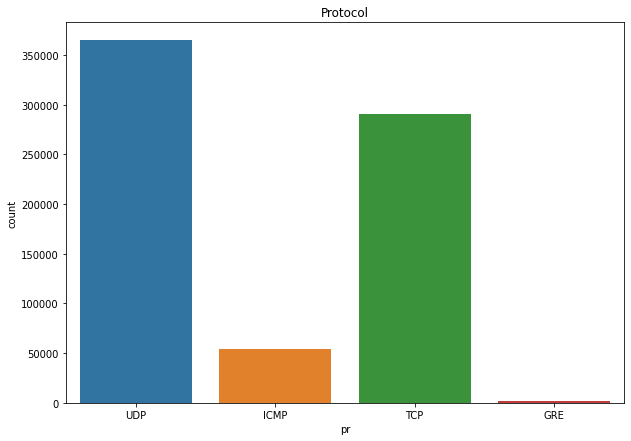

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Protocol")
sns.countplot(data= netflow_host, x='pr')

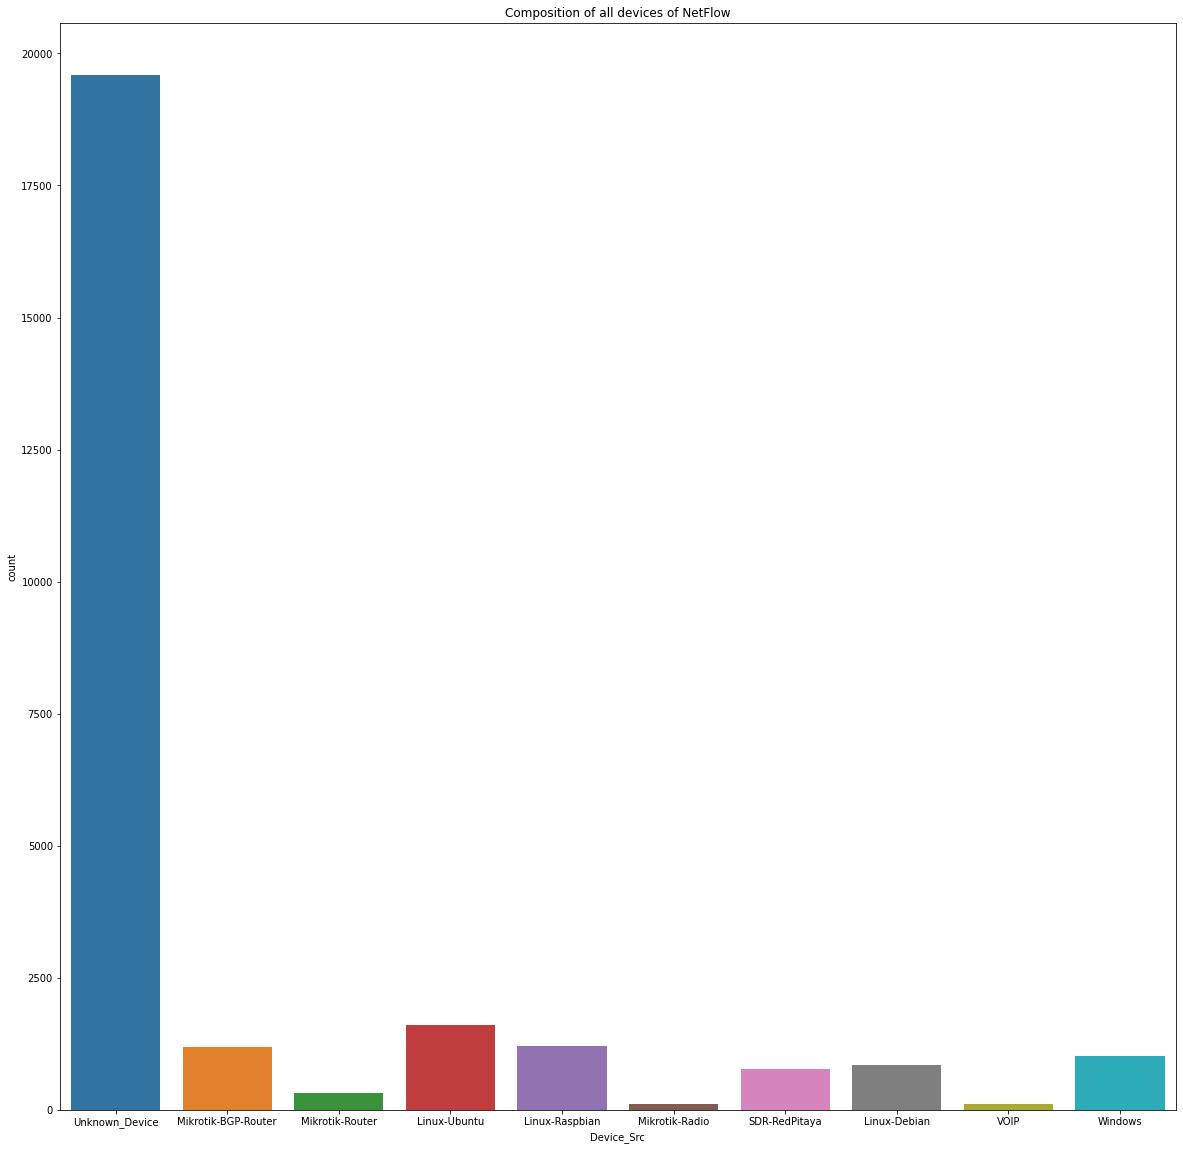

In [ ]:
plt.figure(figsize=(20,20))
plt.title("Composition of all devices of NetFlow")
sns.countplot(data=netflow_streams, x='Device_Src')

In [ ]:
sns.set(font_scale=1)

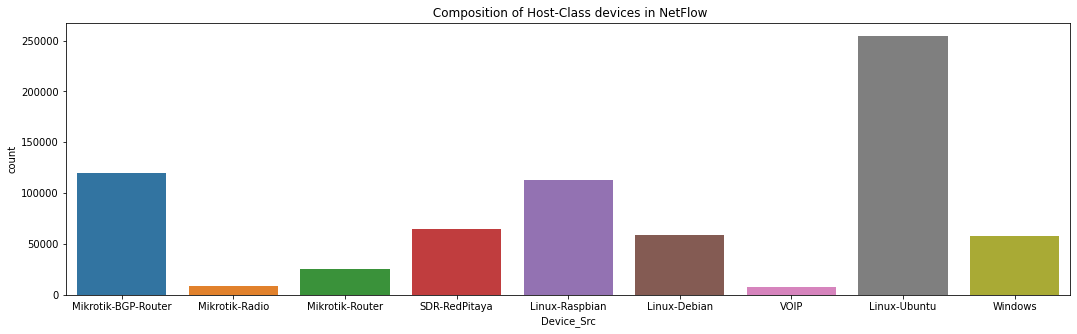

In [ ]:
plt.figure(figsize=(18,5))
plt.title(" Composition of Host-Class devices in NetFlow")
sns.countplot(data=netflow_host, x='Device_Src')

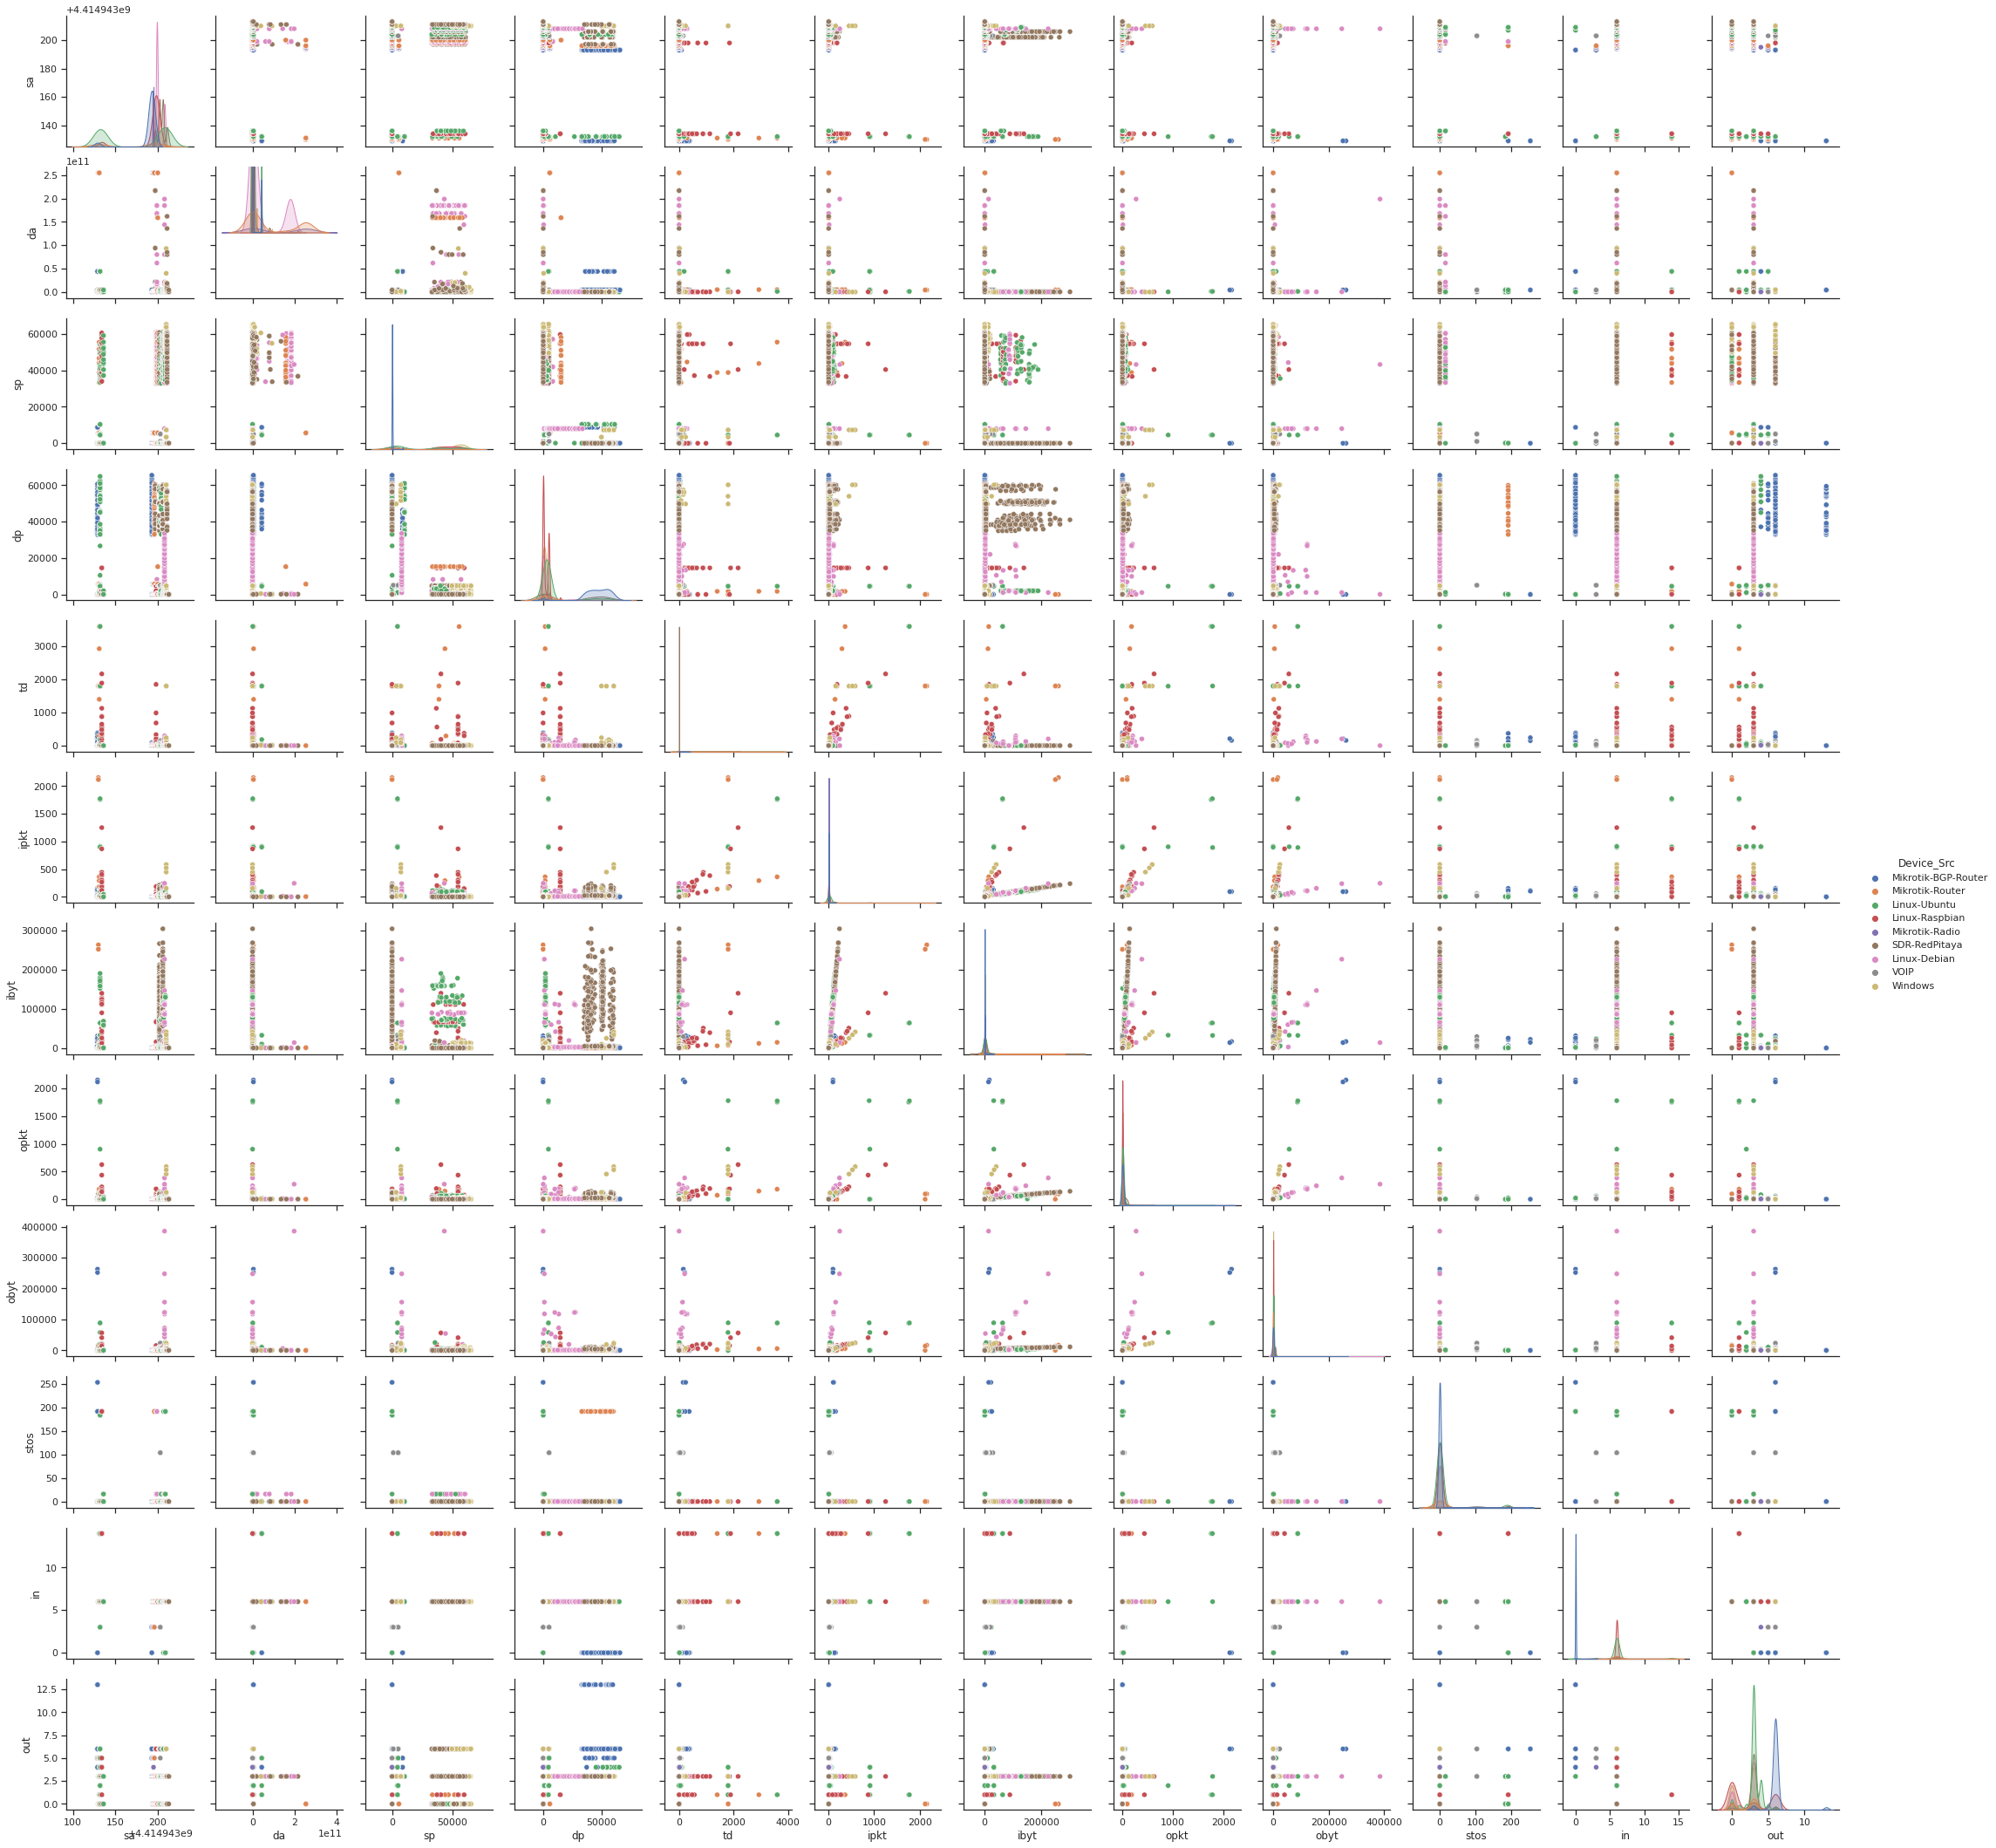

In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(netflow_host, hue="Device_Src")

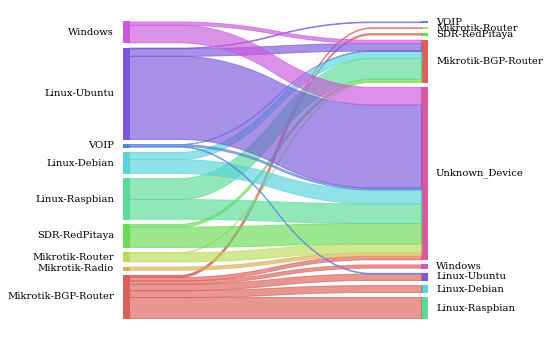

In [ ]:
sankey.sankey(left=netflow_host['Device_Src'], right=netflow_host['Device_Dst'], aspect=20,fontsize=10)

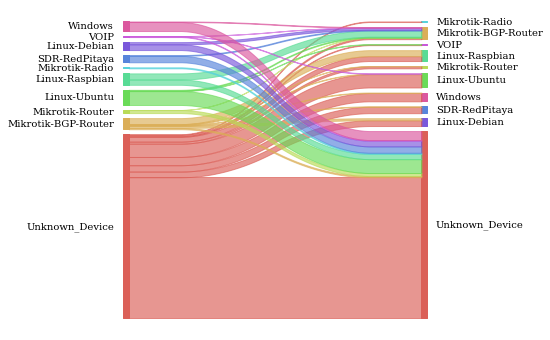

In [ ]:
sankey.sankey(left=netflow_streams['Device_Src'], right=netflow_streams['Device_Dst'], aspect=20,fontsize=10)

In [ ]:
#Import Test Data
Test= pd.read_csv('/content/netflow2021101212-13.csv', usecols=['td','sa','da','sp','dp','pr','ipkt','ibyt','opkt','obyt','stos','in','out'])

In [ ]:
netflow= netflow.dropna()
Test = Test.dropna()

In [ ]:
print(netflow.shape)
print(test.shape)

In [ ]:
#Convert all attributes to a standard data type
netflow['sp'] = netflow.sp.astype(float)
netflow['dp'] = netflow.dp.astype(float)
netflow['stos'] = netflow.stos.astype(float)
netflow['td'] = netflow.td.astype(float)
netflow['ipkt'] = netflow.ipkt.astype(float)
netflow['ibyt'] = netflow.ibyt.astype(float)
netflow['opkt'] = netflow.opkt.astype(float)
netflow['obyt'] = netflow.obyt.astype(float)
netflow['in'] = netflow['in'].astype(float)
netflow['out'] = netflow.out.astype(float)

In [ ]:
netflow.dtypes

In [ ]:
# Feature Engineering 1
# Aggregate Numerical features of unique devices 
aggregation_functions = {'td':'sum','ipkt':'sum','ibyt':'sum','opkt':'sum','obyt':'sum','stos':'first','in':'first', 'out':'first'}

In [ ]:
#Group flows by devices to create data streams
netflow = netflow.groupby(['sa','da','sp','dp','pr'],as_index=False).aggregate(aggregation_functions)

In [ ]:
#Code to add respective output bytes and output packets of devices
for row1 in range(len(netflow)):
  sa = netflow.at[row1,"sa"]
  da = netflow.at[row1,"da"]
  s_p = netflow.at[row1,"sp"]
  d_p = netflow.at[row1,"dp"]
  p = netflow.at[row1,"pr"]

  for row2 in range(len(netflow)):
      sa_2 = netflow.at[row2,"sa"]
      da_2 = netflow.at[row2,"da"]
      s_p_2 = netflow.at[row2,"sp"]
      d_p_2 = netflow.at[row2,"dp"]
      p_2 = netflow.at[row2,"pr"]

      if sa == da_2 and da == sa_2 and s_p == d_p_2 and d_p == s_p_2 and p == p_2:
        netflow.at[row1,"opkt"] = netflow.at[row2,"ipkt"]
        netflow.at[row1,"obyt"] = netflow.at[row2,"ibyt"]
        break

In [ ]:
netflow.head(50)

In [ ]:
#Feature Engineering 2
port_values = pd.read_csv('/content/Port numbers 1.csv')
Host_names = pd.read_csv('/content/Device-Types.csv')

In [ ]:
Host_names.head(50)

,IP,Type
0,44.149.43.129,Mikrotik-BGP-Router
1,44.149.43.130,Mikrotik-Router
2,44.149.43.131,Mikrotik-Router
3,44.149.43.132,Linux-Ubuntu
4,44.149.43.134,Linux-Raspbian
5,44.149.43.136,Linux-Ubuntu
6,44.149.43.193,Mikrotik-BGP-Router
7,44.149.43.194,Mikrotik-Radio
8,44.149.43.195,Mikrotik-Radio
9,44.149.43.196,Mikrotik-Router


In [ ]:
Host_names['IP'] = Host_names.IP.str.replace(".","")
Host_names['IP'] = Host_names.IP.astype(int)


In [ ]:
#Converting Port numbers and description into a dictionary
port2value = zip(port_values['Port'], port_values['Description'])
port_description = list(port2value)
Port_value = dict(port_description)
Port_value

{0: 'In programming APIs- requests a system-allocated (dynamic) port',
 1: 'TCP Port Service Multiplexer (TCPMUX)',
 2: 'CompressNET Management Utility(official)',
 3: 'CompressNET Compression Process(Official)',
 5: 'Remote Job Entry',
 7: 'Echo Protocol',
 9: 'Discard Protocol',
 10: 'Wake-on-LAN',
 11: 'Active Users (systat service)',
 13: 'Daytime Protocol',
 15: 'Previously netstat service',
 17: 'Quote of the Day (QOTD)',
 18: 'Message Send Protocol',
 19: 'Character Generator Protocol (CHARGEN)',
 20: 'File Transfer Protocol (FTP) data transfer',
 21: 'File Transfer Protocol (FTP) control (command)',
 22: 'Secure Shell (SSH)',
 23: 'Telnet protocol—unencrypted text communications',
 25: 'Simple Mail Transfer Protocol (SMTP)',
 28: "Palo Alto Networks' Panorama High Availability (HA)",
 37: 'Time Protocol',
 42: 'Host Name Server Protocol',
 43: 'WHOIS protocol',
 49: 'TACACS Login Host protocol',
 51: 'Historically used for Interface Message Processor ',
 52: 'Xerox Network Syst

In [ ]:
#Mapping Values
netflow['Src_value'] = netflow['sp'].map(Port_value)
netflow['Dst_value'] = netflow['dp'].map(Port_value)
netflow.Src_value = netflow.Src_value.fillna("Unassigned")
netflow.Dst_value = netflow.Dst_value.fillna("Unassigned")

In [ ]:
predicted_device['Src_value'] = predicted_device['sp'].map(Port_value)
predicted_device['Dst_value'] = predicted_device['dp'].map(Port_value)
predicted_device.Src_value = predicted_device.Src_value.fillna("Unassigned")
predicted_device.Dst_value = predicted_device.Dst_value.fillna("Unassigned")

In [ ]:
predicted_device.to_csv('Device-Predicted.csv' , index=False)

In [ ]:
#Converting Host_Names and description into a dictionary
host2value = zip(Host_names['IP'], Host_names['Type'])
Host_description = list(host2value)
host_value = dict(Host_description)
host_value

{'44.149.43.129': 'Mikrotik-BGP-Router',
 '44.149.43.130': 'Mikrotik-Router',
 '44.149.43.131': 'Mikrotik-Router',
 '44.149.43.132': 'Linux-Ubuntu',
 '44.149.43.134': 'Linux-Raspbian',
 '44.149.43.136': 'Linux-Ubuntu',
 '44.149.43.193': 'Mikrotik-BGP-Router',
 '44.149.43.194': 'Mikrotik-Radio',
 '44.149.43.195': 'Mikrotik-Radio',
 '44.149.43.196': 'Mikrotik-Router',
 '44.149.43.197': 'SDR-RedPitaya',
 '44.149.43.198': 'Linux-Raspbian',
 '44.149.43.199': 'Linux-Debian',
 '44.149.43.200': 'Mikrotik-Router',
 '44.149.43.202': 'SDR-RedPitaya',
 '44.149.43.203': 'VOIP',
 '44.149.43.204': 'Linux-Ubuntu',
 '44.149.43.206': 'SDR-RedPitaya',
 '44.149.43.207': 'Linux-Ubuntu',
 '44.149.43.208': 'Linux-Debian',
 '44.149.43.209': 'Linux-Ubuntu',
 '44.149.43.210': 'Windows',
 '44.149.43.211': 'SDR-RedPitaya',
 '44.149.43.213': 'SDR-RedPitaya'}

AttributeError: ignored

In [ ]:
netflow['Device_Src'] = netflow['sa'].map(host_value)
netflow['Device_Dst'] = netflow['da'].map(host_value)
netflow['Device_Src'] = netflow['Device_Src'].fillna("Unknown_Device")
netflow['Device_Dst'] = netflow['Device_Dst'].fillna("Unknown_Device")

In [ ]:
netflow_host[]

In [ ]:
netflow.head(50)

,sa,da,sp,dp,pr,td,ipkt,ibyt,opkt,obyt,stos,in,out,Src_value,Dst_value,Device_Src,Device_Dst
0,13.107.4.50,44.149.43.210,80,54313,TCP,15.02,5.0,400.0,5.0,260.0,192.0,3.0,6.0,Hypertext Transfer Protocol (HTTP),Unassigned,Unknown_Device,Windows
1,158.247.7.204,44.149.43.199,8245,51266,TCP,0.00,1.0,88.0,1.0,60.0,192.0,3.0,6.0,Dynamic DNS for at least No-IP and DynDNS,Unassigned,Unknown_Device,Linux-Debian
2,159.148.147.201,44.149.43.200,15252,45472,UDP,5.00,2.0,188.0,2.0,132.0,192.0,3.0,6.0,Unassigned,Unassigned,Unknown_Device,Mikrotik-Router
3,159.148.172.251,44.149.43.200,15252,33712,UDP,5.00,2.0,188.0,2.0,132.0,192.0,3.0,6.0,Unassigned,Unassigned,Unknown_Device,Mikrotik-Router
4,168.235.104.115,44.149.43.199,80,46048,TCP,0.00,1.0,88.0,1.0,60.0,192.0,3.0,6.0,Hypertext Transfer Protocol (HTTP),Unassigned,Unknown_Device,Linux-Debian
5,168.235.104.115,44.149.43.199,80,46056,TCP,0.00,1.0,88.0,1.0,60.0,192.0,3.0,6.0,Hypertext Transfer Protocol (HTTP),Unassigned,Unknown_Device,Linux-Debian
6,168.235.104.115,44.149.43.199,80,46058,TCP,0.00,1.0,88.0,1.0,60.0,192.0,3.0,6.0,Hypertext Transfer Protocol (HTTP),Unassigned,Unknown_Device,Linux-Debian
7,168.235.104.115,44.149.43.199,80,46064,TCP,0.00,1.0,88.0,1.0,60.0,192.0,3.0,6.0,Hypertext Transfer Protocol (HTTP),Unassigned,Unknown_Device,Linux-Debian
8,168.235.104.115,44.149.43.199,80,46066,TCP,0.00,1.0,88.0,1.0,60.0,192.0,3.0,6.0,Hypertext Transfer Protocol (HTTP),Unassigned,Unknown_Device,Linux-Debian
9,185.199.108.153,44.149.43.199,443,57336,TCP,0.00,1.0,88.0,1.0,60.0,192.0,3.0,6.0,Hypertext Transfer Protocol Secure (HTTPS),Unassigned,Unknown_Device,Linux-Debian


In [ ]:
netflow.to_csv('NetFlow-AllStreams.csv', index= False)

In [ ]:
plot_distribution(netflow['Device_Src'])

In [ ]:
plot_distribution(netflow['Device_Dst'])

In [ ]:
plt.scatter(netflow.Device_Src,netflow['Device_Dst'])
plt.xlabel('Device_Src')
plt.ylabel('Device_Dst')

In [ ]:
netflow_host.sa.nunique()


24

In [ ]:
netflow_host.Device_Src.value_counts()

Linux-Ubuntu           1614
Linux-Debian           1331
Mikrotik-BGP-Router    1186
Windows                1021
SDR-RedPitaya           768
Linux-Router            631
Mikrotik-Router         330
Mikrotik-Radio          112
VOIP                    108
Linux-Raspbian          106
Name: Device_Src, dtype: int64

In [ ]:
netflow.Device_Src.nunique()

In [ ]:
netflow.Device_Src.value_counts()

In [ ]:
sankey.sankey(left=netflow['Device_Src'], right=netflow['Device_Dst'], aspect=20,fontsize=4)

In [ ]:
#CIDR ranges
ClassA_range = ipaddress.ip_network('44.149.43.192/26')
for x in ClassA_range.hosts():
  print(x)

44.149.43.193
44.149.43.194
44.149.43.195
44.149.43.196
44.149.43.197
44.149.43.198
44.149.43.199
44.149.43.200
44.149.43.201
44.149.43.202
44.149.43.203
44.149.43.204
44.149.43.205
44.149.43.206
44.149.43.207
44.149.43.208
44.149.43.209
44.149.43.210
44.149.43.211
44.149.43.212
44.149.43.213
44.149.43.214
44.149.43.215
44.149.43.216
44.149.43.217
44.149.43.218
44.149.43.219
44.149.43.220
44.149.43.221
44.149.43.222
44.149.43.223
44.149.43.224
44.149.43.225
44.149.43.226
44.149.43.227
44.149.43.228
44.149.43.229
44.149.43.230
44.149.43.231
44.149.43.232
44.149.43.233
44.149.43.234
44.149.43.235
44.149.43.236
44.149.43.237
44.149.43.238
44.149.43.239
44.149.43.240
44.149.43.241
44.149.43.242
44.149.43.243
44.149.43.244
44.149.43.245
44.149.43.246
44.149.43.247
44.149.43.248
44.149.43.249
44.149.43.250
44.149.43.251
44.149.43.252
44.149.43.253
44.149.43.254


In [ ]:
ClassB_range = ipaddress.ip_network('44.149.43.128/26')
for x in ClassB_range.hosts():
  print(x)

44.149.43.129
44.149.43.130
44.149.43.131
44.149.43.132
44.149.43.133
44.149.43.134
44.149.43.135
44.149.43.136
44.149.43.137
44.149.43.138
44.149.43.139
44.149.43.140
44.149.43.141
44.149.43.142
44.149.43.143
44.149.43.144
44.149.43.145
44.149.43.146
44.149.43.147
44.149.43.148
44.149.43.149
44.149.43.150
44.149.43.151
44.149.43.152
44.149.43.153
44.149.43.154
44.149.43.155
44.149.43.156
44.149.43.157
44.149.43.158
44.149.43.159
44.149.43.160
44.149.43.161
44.149.43.162
44.149.43.163
44.149.43.164
44.149.43.165
44.149.43.166
44.149.43.167
44.149.43.168
44.149.43.169
44.149.43.170
44.149.43.171
44.149.43.172
44.149.43.173
44.149.43.174
44.149.43.175
44.149.43.176
44.149.43.177
44.149.43.178
44.149.43.179
44.149.43.180
44.149.43.181
44.149.43.182
44.149.43.183
44.149.43.184
44.149.43.185
44.149.43.186
44.149.43.187
44.149.43.188
44.149.43.189
44.149.43.190


In [ ]:
#Feature Engineering 3
#Convert Ip addresses datatype from String to Integer
netflow['sa'] = netflow.sa.str.replace(".","")
netflow['da'] = netflow.da.str.replace(".","")
netflow['sa'] = netflow.sa.astype(int)
netflow['da'] = netflow.da.astype(int)

In [ ]:
#Classifying into classes
#Class A - source OR destination (or both) in 44.149.43.192/26   (Site network of DB0TVP in HAMNETDB)
Class_A = netflow[((netflow['sa'] > 4414943192) & (netflow['sa'] < 4414943255)) | ((netflow['da'] > 4414943192) & (netflow['da'] < 4414943255)) ]
Class_A

In [ ]:
Class_A = netflow_streams[(netflow_streams['sa'] == (4414943129, 4414943130))]
Class_A

ValueError: ignored

In [ ]:
Class_A.shape

(10637, 17)

In [ ]:
plot_distribution(class_A['Device_Src'])

In [ ]:
plot_distribution(class_B['Device_Src'])

In [ ]:
plot_distribution(Class_A['Src_value'])

In [ ]:
plot_distribution(Class_A['Dst_value'])

In [ ]:
Class_A.Device_Src.unique()

array(['Unknown_Device', 'Linux-Ubuntu', 'Mikrotik-BGP-Router',
       'Mikrotik-Radio', 'Mikrotik-Router', 'SDR-RedPitaya',
       'Linux-Debian', 'Linux-Router', 'VOIP', 'Windows'], dtype=object)

In [ ]:
Class_A.sa.nunique()

136

In [ ]:
Class_A.Device_Src.value_counts()

Unknown_Device         4484
Linux-Debian           1331
Mikrotik-BGP-Router    1103
Windows                1021
Linux-Ubuntu            890
SDR-RedPitaya           768
Linux-Router            631
Mikrotik-Router         189
Mikrotik-Radio          112
VOIP                    108
Name: Device_Src, dtype: int64

In [ ]:
Class_A.Device_Dst.value_counts()

Unknown_Device         4714
Linux-Debian           1291
Mikrotik-BGP-Router    1168
Windows                 940
Linux-Ubuntu            878
SDR-RedPitaya           728
Linux-Router            618
Mikrotik-Router         136
VOIP                    104
Mikrotik-Radio           60
Name: Device_Dst, dtype: int64

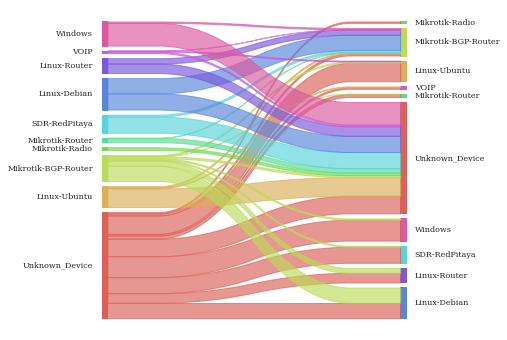

In [ ]:
sankey.sankey(left=Class_A['Device_Src'], right=Class_A['Device_Dst'], aspect=20,fontsize=8)

In [ ]:
#Class B - source OR destination (ot both) in 44.149.43.128/26   (Site network of DB0PAS in HAMNETDB)
Class_B = netflow[((netflow['sa'] > 4414943128) & (netflow['sa'] < 4414943192)) | ((netflow['da'] > 4414943128) & (netflow['da'] < 4414943192)) ]
Class_B

In [ ]:
Class_B = netflow_streams[((netflow_streams['sa'] > 4414943128) & (netflow_streams['sa'] < 4414943192)) | ((netflow_streams['da'] > 4414943128) & (netflow_streams['da'] < 4414943192)) ]
Class_B

,sa,da,sp,dp,pr,td,ipkt,ibyt,opkt,obyt,stos,in,out,Src_value,Dst_value,Device_Src,Device_Dst
117,4.414942e+07,4.414943e+09,4520,4520,UDP,10.19,5,320,96,3456,192,0,6,Microsoft Silverlight Connectable ports under ...,Microsoft Silverlight Connectable ports under ...,Unknown_Device,Linux-Ubuntu
430,4.414943e+07,4.414943e+09,123,123,UDP,0.00,1,76,1,76,184,3,6,Network Time Protocol (NTP),Network Time Protocol (NTP),Unknown_Device,Mikrotik-Router
431,4.414943e+07,4.414943e+09,123,123,UDP,0.00,1,76,1,76,184,3,6,Network Time Protocol (NTP),Network Time Protocol (NTP),Unknown_Device,Mikrotik-Router
432,4.414943e+07,4.414943e+09,123,123,UDP,0.00,1,76,1,76,184,3,6,Network Time Protocol (NTP),Network Time Protocol (NTP),Unknown_Device,Mikrotik-Router
433,4.414943e+07,4.414943e+09,123,123,UDP,0.00,1,76,1,76,184,3,6,Network Time Protocol (NTP),Network Time Protocol (NTP),Unknown_Device,Mikrotik-Router
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26597,1.591480e+11,4.414943e+09,15252,39823,UDP,5.01,2,188,4,264,192,3,13,Unassigned,Unassigned,Unknown_Device,Unknown_Device
26598,1.591480e+11,4.414943e+09,15252,43607,UDP,5.00,2,188,4,264,192,3,13,Unassigned,Unassigned,Unknown_Device,Unknown_Device
26599,1.591480e+11,4.414943e+09,15252,37582,UDP,5.01,2,188,4,264,192,3,13,Unassigned,Unassigned,Unknown_Device,Unknown_Device
26600,1.591480e+11,4.414943e+09,15252,53892,UDP,5.01,2,188,4,264,192,3,13,Unassigned,Unassigned,Unknown_Device,Unknown_Device


In [ ]:
Class_B.shape

(3086, 17)

In [ ]:
plot_distribution(Class_B['Device_Src'])

In [ ]:
plot_distribution(Class_B['Device_Dst'])

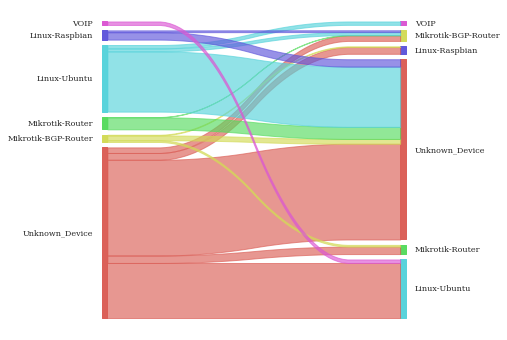

In [ ]:
sankey.sankey(left=Class_B['Device_Src'], right=Class_B['Device_Dst'], aspect=20,fontsize=8)

In [ ]:
#Class C - Anything Else
Class_C = netflow[(~((netflow['sa'] > 4414943128) & (netflow['sa'] < 4414943255))) & (~((netflow['da'] > 4414943128) & (netflow['da'] < 4414943255))) ]
Class_C

In [ ]:
Class_C.shape

In [ ]:
sankey.sankey(left=Class_C['Device_Src'], right=Class_C['Device_Dst'], aspect=20,fontsize=8)

In [ ]:
plot_distribution(Class_C['Device_Src'])

In [ ]:
#Union of Class A and Class B
Class_A1 = pd.concat([Class_A,Class_B], ignore_index=True)
Class_A1.shape

(13723, 17)

In [ ]:
#Sorting Source IP with reference to Destination IP
Src_Ip_Sorted = Class_A1.sort_values(by=['sa','da'])
# Src_Ip_Sorted.to_csv('Subnet-nfcapd202109101029.csv', index=False)
Src_Ip_Sorted.shape

(13723, 17)

In [ ]:
def Device_type():
    Device_type= sorted(Src_Ip_Sorted['Device_Src'].unique())
    return Device_type
Device_type=Device_type()
Device_type

['Linux-Debian',
 'Linux-Raspbian',
 'Linux-Router',
 'Linux-Ubuntu',
 'Mikrotik-BGP-Router',
 'Mikrotik-Radio',
 'Mikrotik-Router',
 'SDR-RedPitaya',
 'Unknown_Device',
 'VOIP',
 'Windows']

In [ ]:
classA= pd.read_csv('/content/drive/MyDrive/Master_Thesis/NetFlow_Data/NetFlow Data All/ClassA-Same-Pattern.csv', usecols=['td','sa','da','sp','dp','pr','ipkt','ibyt','opkt','obyt','stos','Src_value', 'in','out', 'Dst_value','Device_Src'])
classB= pd.read_csv('/content/drive/MyDrive/Master_Thesis/NetFlow_Data/NetFlow Data All/ClassB-Same-Pattern.csv', usecols=['td','sa','da','sp','dp','pr','ipkt','ibyt','opkt','obyt','stos','Src_value', 'in', 'out', 'Dst_value','Device_Src'])
classC= pd.read_csv('/content/drive/MyDrive/Master_Thesis/NetFlow_Data/NetFlow Data All/Class_C_Datastream.csv', usecols=['td','sa','da','sp','dp','pr','ipkt','ibyt','opkt','obyt','stos','in','out','Src_value', 'Dst_value','Device_Src'])

In [ ]:
#Feature Scaling and encoding
le = LabelEncoder()
sc = StandardScaler()
netflow_host['Device_Dst'] = le.fit_transform(netflow_host['Device_Dst'])
netflow_host['Src_value'] = le.fit_transform(netflow_host['Src_value'])
netflow_host['Dst_value'] = le.fit_transform(netflow_host['Dst_value'])
netflow_host['pr'] = le.fit_transform(netflow_host['pr'])
netflow_host['Device_Src'] = le.fit_transform(netflow_host['Device_Src'])
# netflow = pd.get_dummies(data=netflow, columns=['pr'])

In [ ]:
#Feature Scaling and encoding
le = LabelEncoder()
sc = StandardScaler()
classA['Src_value'] = le.fit_transform(classA['Src_value'])
classA['Dst_value'] = le.fit_transform(classA['Dst_value'])
classA['pr'] = le.fit_transform(classA['pr'])
classA['Device_Src'] = le.fit_transform(classA['Device_Src'])
# netflow = pd.get_dummies(data=netflow, columns=['pr'])



In [ ]:
classB['Src_value'] = le.fit_transform(classB['Src_value'])
classB['Dst_value'] = le.fit_transform(classB['Dst_value'])
classB['pr'] = le.fit_transform(classB['pr'])
classB['Device_Src'] = le.fit_transform(classB['Device_Src'])

In [ ]:
labels_dict = {index: value for index, value in enumerate(le.classes_)}
labels_dict

{0: 'Linux-Debian',
 1: 'Linux-Raspbian',
 2: 'Linux-Ubuntu',
 3: 'Mikrotik-BGP-Router',
 4: 'Mikrotik-Radio',
 5: 'Mikrotik-Router',
 6: 'SDR-RedPitaya'}

In [ ]:
classC['Src_value'] = le.fit_transform(classC['Src_value'])
classC['Dst_value'] = le.fit_transform(classC['Dst_value'])
classC['pr'] = le.fit_transform(classC['pr'])
classC['Device_Src'] = le.fit_transform(classC['Device_Src'])

In [ ]:
netflow_unknown['Device_Dst'] = le.fit_transform(netflow_unknown['Device_Dst'])
netflow_unknown['Src_value'] = le.fit_transform(netflow_unknown['Src_value'])
netflow_unknown['Dst_value'] = le.fit_transform(netflow_unknown['Dst_value'])
netflow_unknown['pr'] = le.fit_transform(netflow_unknown['pr'])
netflow_unknown['Device_Src'] = le.fit_transform(netflow_unknown['Device_Src'])

In [ ]:
Label_encode = {0: 'Linux-Debian',
 1: 'Linux-Raspbian',
 2: 'Linux-Ubuntu',
 3: 'Mikrotik-BGP-Router',
 4: 'Mikrotik-Radio',
 5: 'Mikrotik-Router',
 6: 'SDR-RedPitaya',
 7: 'VOIP',
 8: 'Windows'}

In [ ]:
#Normalisation
scaling = MinMaxScaler()
netflow_host[['td','ipkt','ibyt','opkt','obyt']] = scaling.fit_transform(netflow_host[['td','ipkt','ibyt','opkt','obyt']])
netflow_unknown[['td','ipkt','ibyt','opkt','obyt']] = scaling.fit_transform(netflow_unknown[['td','ipkt','ibyt','opkt','obyt']])
classA[['td','ipkt','ibyt','opkt','obyt']] = scaling.fit_transform(classA[['td','ipkt','ibyt','opkt','obyt']])
classB[['td','ipkt','ibyt','opkt','obyt']] = scaling.fit_transform(classB[['td','ipkt','ibyt','opkt','obyt']])
classC[['td','ipkt','ibyt','opkt','obyt']] = scaling.fit_transform(classC[['td','ipkt','ibyt','opkt','obyt']])

In [ ]:
#Normalisation
scaling = MinMaxScaler()
classA[['td','ipkt','ibyt','opkt','obyt','in','out']] = scaling.fit_transform(classA[['td','ipkt','ibyt','opkt','obyt','in','out']])

In [ ]:
netflow_unknown[['td','ipkt','ibyt','opkt','obyt','in','out']] = scaling.fit_transform(netflow_unknown[['td','ipkt','ibyt','opkt','obyt','in','out']])

In [ ]:
classB[['td','ipkt','ibyt','opkt','obyt','in','out']] = scaling.fit_transform(classB[['td','ipkt','ibyt','opkt','obyt','in','out']])

In [ ]:
#Standardization
sc = StandardScaler()
netflow[['td', 'sp', 'dp', 'stos', 'ipkt','ibyt','opkt','obyt','in','out', 'Src_value', 'Dst_value']] = sc.fit_transform(netflow[['td', 'sp', 'dp', 'stos', 'ipkt','ibyt','opkt','obyt','in','out', 'Src_value', 'Dst_value']])

In [ ]:
Class_A['Device_Dst'] = le.fit_transform(Class_A['Device_Dst'])
Class_A['Src_value'] = le.fit_transform(Class_A['Src_value'])
Class_A['Dst_value'] = le.fit_transform(Class_A['Dst_value'])
Class_A['pr'] = le.fit_transform(Class_A['pr'])
Class_A['Device_Src'] = le.fit_transform(Class_A['Device_Src'])
# Class_A1 = pd.get_dummies(data=Class_A1, columns=['pr'])
Class_A[['td','ipkt','ibyt','opkt','obyt','in','out']] = scaling.fit_transform(Class_A[['td','ipkt','ibyt','opkt','obyt','in','out']])

In [ ]:
Class_B['Device_Dst'] = le.fit_transform(Class_B['Device_Dst'])
Class_B['Src_value'] = le.fit_transform(Class_B['Src_value'])
Class_B['Dst_value'] = le.fit_transform(Class_B['Dst_value'])
Class_B['pr'] = le.fit_transform(Class_B['pr'])
Class_B['Device_Src'] = le.fit_transform(Class_A['Device_Src'])
# Class_A1 = pd.get_dummies(data=Class_A1, columns=['pr'])
Class_B[['td','ipkt','ibyt','opkt','obyt','in','out']] = scaling.fit_transform(Class_B[['td','ipkt','ibyt','opkt','obyt','in','out']])

In [ ]:
classA.head(50)

,sa,da,sp,dp,pr,td,ipkt,ibyt,opkt,obyt,stos,in,out,Src_value,Dst_value,Device_Src
0,44.149.43.132,104.236.30.141,41472,80,1,0.001345,0.000171,1.524052e-05,0.000115,0.000021,0.0,14.0,1.0,35,20,2
1,44.149.43.132,104.236.30.141,34284,80,1,0.001291,0.000171,1.524052e-05,0.000115,0.000021,0.0,6.0,3.0,35,20,2
2,44.149.43.132,104.236.30.141,53446,80,1,0.001054,0.000171,1.524052e-05,0.000115,0.000021,0.0,6.0,3.0,35,20,2
3,44.149.43.132,104.236.30.141,45008,80,1,0.001051,0.000171,1.524052e-05,0.000115,0.000021,0.0,6.0,3.0,35,20,2
4,44.149.43.132,104.236.30.141,34016,80,1,0.001999,0.000171,1.524052e-05,0.000115,0.000021,0.0,14.0,1.0,35,20,2
5,44.149.43.132,137.226.79.98,4520,4520,2,0.978739,0.027969,9.598855e-04,0.051862,0.004619,0.0,14.0,1.0,23,32,2
6,44.149.43.132,137.226.79.98,4520,4520,2,0.980370,0.027393,9.400995e-04,0.050508,0.004492,0.0,14.0,1.0,23,32,2
7,44.149.43.132,137.226.79.98,4520,4520,2,0.490180,0.013868,4.759321e-04,0.051286,0.004567,0.0,6.0,3.0,23,32,2
8,44.149.43.132,137.226.79.98,4520,4520,2,0.980373,0.027626,9.481208e-04,0.051171,0.004556,0.0,14.0,1.0,23,32,2
9,44.149.43.132,195.37.16.115,0,0,0,0.000316,0.000016,1.010093e-06,0.000000,0.000000,0.0,14.0,1.0,17,23,2


In [ ]:
classC.head(50)

,sa,da,sp,dp,pr,td,ipkt,ibyt,opkt,obyt,stos,in,out,Src_value,Dst_value,Device_Src
0,44.149.43.131,255.255.255.255,5678,5678,2,0.0,0.0008,0.000143,0.0,0.0,0.0,6.0,0.0,31,37,5
1,44.149.43.131,255.255.255.255,5678,5678,2,0.0,0.0008,0.000143,0.0,0.0,0.0,6.0,0.0,31,37,5
2,44.149.43.131,255.255.255.255,5678,5678,2,0.0,0.0008,0.000143,0.0,0.0,0.0,6.0,0.0,31,37,5
3,44.149.43.131,255.255.255.255,5678,5678,2,0.0,0.0008,0.000143,0.0,0.0,0.0,6.0,0.0,31,37,5
4,44.149.43.131,255.255.255.255,5678,5678,2,0.0,0.0008,0.000143,0.0,0.0,0.0,6.0,0.0,31,37,5
5,44.149.43.131,255.255.255.255,5678,5678,2,0.0,0.0008,0.000143,0.0,0.0,0.0,6.0,0.0,31,37,5
6,44.149.43.131,255.255.255.255,5678,5678,2,0.0,0.0008,0.000143,0.0,0.0,0.0,6.0,0.0,31,37,5
7,44.149.43.131,255.255.255.255,5678,5678,2,0.0,0.0002,0.000053,0.0,0.0,0.0,6.0,0.0,31,37,5
8,44.149.43.131,255.255.255.255,5678,5678,2,0.0,0.0008,0.000143,0.0,0.0,0.0,6.0,0.0,31,37,5
9,44.149.43.131,255.255.255.255,5678,5678,2,0.0,0.0008,0.000143,0.0,0.0,0.0,6.0,0.0,31,37,5


In [ ]:
netflow_host.head(50)

,sa,da,sp,dp,pr,td,ipkt,ibyt,opkt,obyt,stos,in,out,Src_value,Dst_value,Device_Src,Device_Dst
0,44.149.43.129,44.148.230.161,8728,41242,2,0.000277,0.000276,0.000043,0.000245,0.000056,0.0,0.0,4.0,40,73,3,6
1,44.149.43.129,44.148.230.161,8728,40182,2,0.000254,0.000276,0.000043,0.000259,0.000058,0.0,0.0,4.0,40,73,3,6
2,44.149.43.129,44.148.230.161,8728,39596,2,0.000591,0.000276,0.000043,0.000245,0.000056,0.0,0.0,4.0,40,73,3,6
3,44.149.43.129,44.148.230.161,8728,38992,2,0.000923,0.000276,0.000043,0.000245,0.000056,0.0,0.0,4.0,40,73,3,6
4,44.149.43.129,44.148.230.161,8728,38316,2,0.000254,0.000276,0.000043,0.000259,0.000058,0.0,0.0,4.0,40,73,3,6
5,44.149.43.129,44.148.230.161,8728,37404,2,0.000277,0.000276,0.000043,0.000245,0.000056,0.0,0.0,4.0,40,73,3,6
6,44.149.43.129,44.148.230.161,8728,35944,2,0.000254,0.000276,0.000043,0.000259,0.000058,0.0,0.0,4.0,40,73,3,6
7,44.149.43.129,44.148.230.161,8728,37442,2,0.000307,0.000276,0.000043,0.000259,0.000058,0.0,0.0,4.0,40,73,3,6
8,44.149.43.129,44.148.230.161,8728,38778,2,0.000264,0.000276,0.000043,0.000259,0.000058,0.0,0.0,4.0,40,73,3,6
9,44.149.43.129,44.148.230.161,8728,38246,2,0.000254,0.000276,0.000043,0.000245,0.000056,0.0,0.0,4.0,40,73,3,6


In [ ]:
x1 = classA.drop(['sa', 'da', 'Device_Src'],axis=1)
y1 = classA['Device_Src']

In [ ]:
x2 = classB.drop(['sa', 'da', 'Device_Src'],axis=1)
y2 = classB['Device_Src']

In [ ]:
x3 = classC.drop(['sa', 'da', 'Device_Src'],axis=1)
y3 = classC['Device_Src']

In [ ]:
x4 = netflow_host.drop(['sa', 'da', 'Device_Src','Device_Dst'],axis=1)
y4 = netflow_host['Device_Src']

In [ ]:
x5 = netflow_unknown.drop(['sa', 'da', 'Device_Src','Device_Dst'],axis=1)
y5 = netflow_unknown['Device_Src']

In [ ]:
#Splitting the dataset into Train and testing dataset
x4_train,x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.40, random_state=42)
x5_train,x5_test, y5_train, y5_test = train_test_split(x5, y5, test_size=0.40, random_state=42)

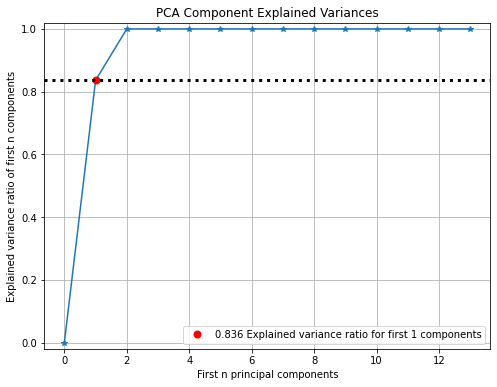

In [ ]:
pca = PCA(random_state=1)
pca.fit(x1)
skplt.decomposition.plot_pca_component_variance(pca, figsize=(8,6));

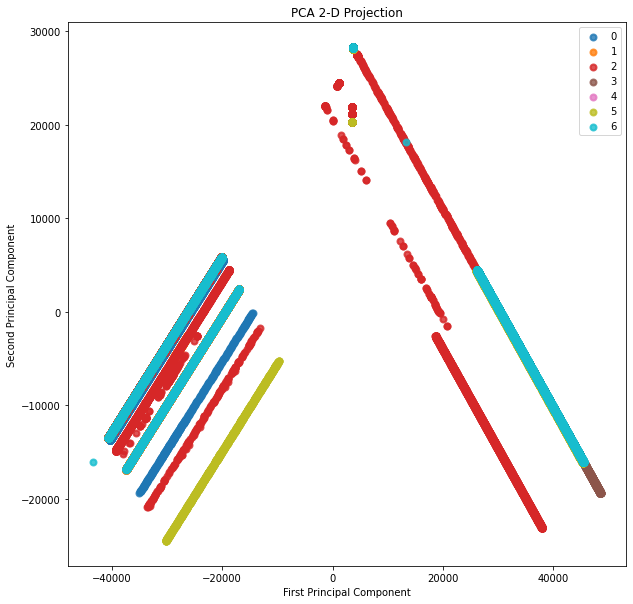

In [ ]:
skplt.decomposition.plot_pca_2d_projection(pca, x1, y1,
                                           figsize=(10,10),
                                           cmap="tab10");

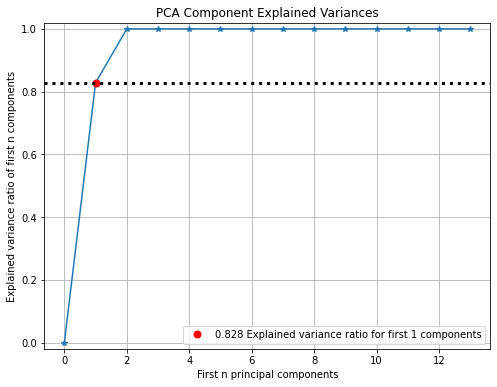

In [ ]:
pca = PCA(random_state=1)
pca.fit(x2)
skplt.decomposition.plot_pca_component_variance(pca, figsize=(8,6));

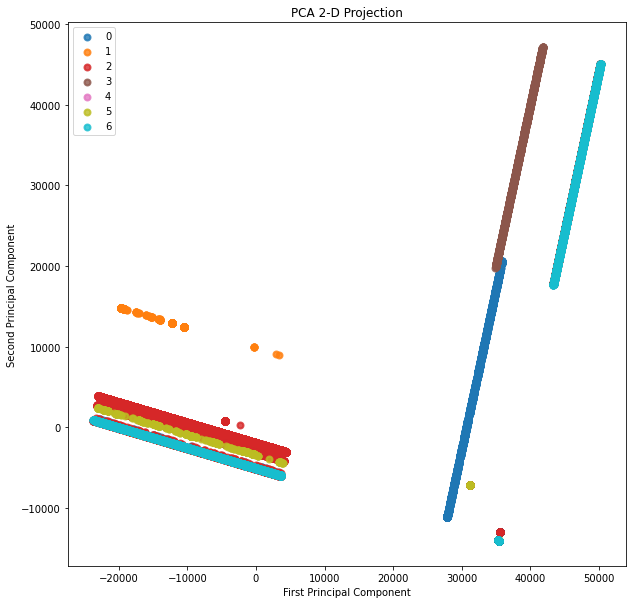

In [ ]:
skplt.decomposition.plot_pca_2d_projection(pca, x2, y2,
                                           figsize=(10,10),
                                           cmap="tab10");

In [ ]:
#K-NN 
model1 = KNeighborsClassifier(n_neighbors=1)
model1.fit(x1, y1)
print("Accuracy:",model1.score(x2, y2)*100)


Accuracy: 80.66721113557276


In [ ]:
predKNN = model1.predict(x2)
predKNN

array([2, 2, 2, ..., 6, 6, 6])

In [ ]:
predknn_df = pd.DataFrame()
predknn_df['Device_KNN'] = predKNN
# predknn_df.to_csv('CSV_file_name.csv', index= False)

In [ ]:
predknn_df['Device_KNN'] = predknn_df['Device_KNN'].map(labels_dict)

In [ ]:
classB['Device_KNN'] = predknn_df['Device_KNN']

In [ ]:
model1 = KNeighborsClassifier()
model1.fit(x2_train, y2_train)
print("Accuracy:",model1.score(x2_test, y2_test)*100)

In [ ]:
probabilities = model1.predict(x1_test)

# get predicted classes
pred_classes = np.argmax(probabilities)
pred_classes

In [ ]:
#Decision Trees
model5 = DecisionTreeClassifier(criterion = 'gini')
prob = model5.fit(x1, y1)
print("Accuracy:",model5.score(x2, y2)*100)

Accuracy: 75.8286875932107


In [ ]:
bgdt = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 200, max_features = 1.0)
bgdt.fit(x1,y1)
bgdt.score(x2,y2)

0.7621262694410909

In [ ]:
predDT = model5.predict(x2)
predDT

array([3, 3, 3, ..., 2, 2, 2])

In [ ]:
predDT = model5.predict(x2)
predDT_df = pd.DataFrame()
predDT_df['Device_DT'] = predDT
predDT_df['Device_DT'] = predDT_df['Device_DT'].map(labels_dict)
classB['Device_DT'] = predDT_df['Device_DT']

In [ ]:
class_B.to_csv('Test_classBagain.csv', index= False)

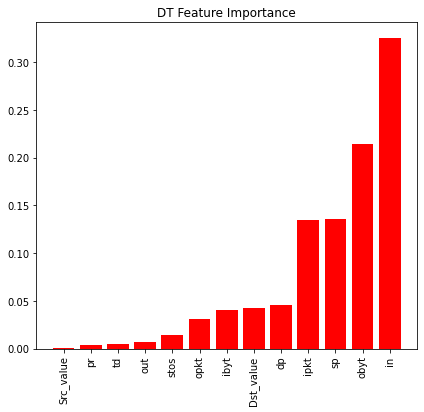

In [ ]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
skplt.estimators.plot_feature_importances(model5, feature_names=x1.columns,
                                         title="DT Feature Importance",
                                         x_tick_rotation=90, order="ascending",
                                         ax=ax1);

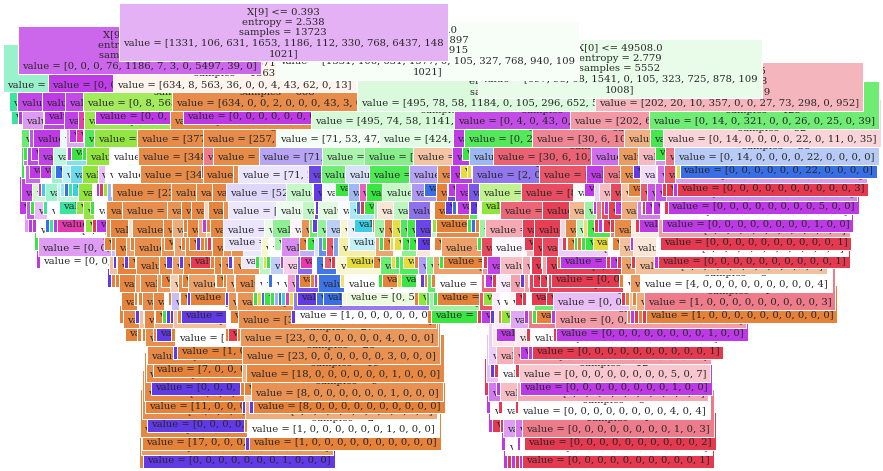

In [ ]:
from sklearn import tree
plt.figure(figsize=(12,8)) 
tree.plot_tree(model5, filled=True, fontsize=10)
plt.show()

In [ ]:
#Random Forest
model6 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
model6.fit(x1, y1)
print("Accuracy:",model6.score(x2, y2)*100)

Accuracy: 78.00848661316668


In [ ]:
model6.fit(x1, y1)
print("Accuracy:",model6.score(x2, y2)*100)

Accuracy: 38.68567946853257


In [ ]:
probarf = model6.predict_proba(x2)
probarf

array([[0.        , 0.02      , 0.55      , ..., 0.        , 0.16      ,
        0.        ],
       [0.        , 0.02      , 0.55      , ..., 0.        , 0.16      ,
        0.        ],
       [0.        , 0.02      , 0.55      , ..., 0.        , 0.16      ,
        0.        ],
       ...,
       [0.14537796, 0.07932011, 0.43994528, ..., 0.08633832, 0.16814882,
        0.08086952],
       [0.14537796, 0.07932011, 0.43994528, ..., 0.08633832, 0.16814882,
        0.08086952],
       [0.14537796, 0.07932011, 0.43994528, ..., 0.08633832, 0.16814882,
        0.08086952]])

In [ ]:
classBprobatest = pd.DataFrame({
     "Device_Ip":list(class_B["sa"]),
     "Groundtruth":list(class_B["Device_Src"]),
     "predKNN":list(predKNN),
     "predXGBC":list(predXGBC),
     "predRF":list(predRF),
     "predDT":list(predDT),
     "probaKNN":list(probaknn),
     "probaDT":list(probadt),
     "probaRF":list(probarf),
     "probaXGBC":list(probaxgbc)
     })

classBprobatest.to_csv("classBprobatest1.csv", 
          index=False)

In [ ]:
predRF = model6.predict(x2)
predrf_df = pd.DataFrame()


In [ ]:
predrf_df.head(10)

""


In [ ]:
predrf_df['Device_RF'] = predRF
predrf_df['Device_RF'] = predrf_df['Device_RF'].map(labels_dict)
classB['Device_RF'] = predrf_df['Device_RF']

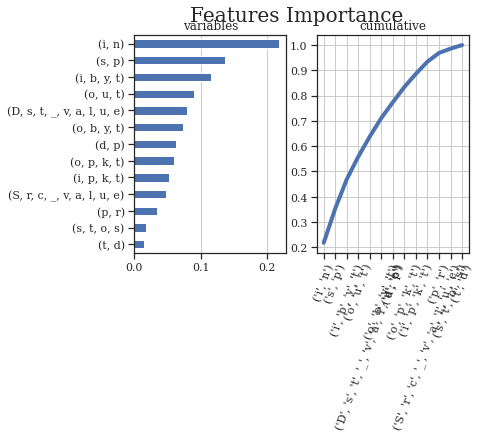

In [ ]:

importances = model6.feature_importances_
dtf_importances = pd.DataFrame({"IMPORTANCE":importances, 
            "VARIABLE": x1}).sort_values("IMPORTANCE", 
            ascending=False)
dtf_importances['cumsum'] =  dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")

fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(
                kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4, 
                                 legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)), 
          xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')
plt.show()

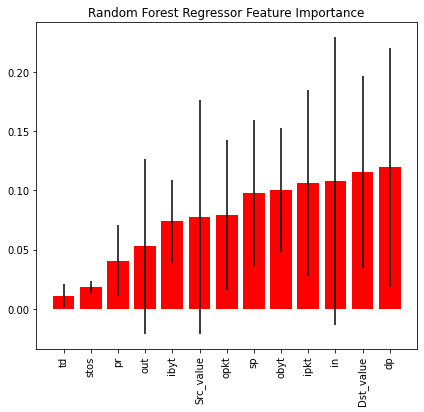

In [ ]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
skplt.estimators.plot_feature_importances(model6, feature_names=x1.columns,
                                         title="Random Forest Regressor Feature Importance",
                                         x_tick_rotation=90, order="ascending",
                                         ax=ax1);

In [ ]:
model6 = RandomForestClassifier(n_estimators = 50, criterion = 'entropy')
model6.fit(x1, y1)
print("Accuracy:",model6.score(x2, y2)*100)

Accuracy: 24.967569479932386


In [ ]:
#XGBC
xgbc = XGBClassifier()
print(xgbc)

XGBClassifier()


In [ ]:
xgbc.fit(x1, y1)
# scores = cross_val_score(xgbc, x1, y1, cv=5)
# print("Mean cross-validation score: %.2f" % scores.mean())


XGBClassifier(objective='multi:softprob')

In [ ]:
kfold = KFold(n_splits=20, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, x1, y1, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

In [ ]:
print("Accuracy:",xgbc.score(x2, y2)*100)

Accuracy: 78.01026205525176


In [ ]:
xgbc.fit(x3, y3)
scores = cross_val_score(xgbc, x3_train, y3_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.94


In [ ]:
kfold = KFold(n_splits=20, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, x3_train, y3_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.94


In [ ]:
print("Accuracy:",xgbc.score(x3_test, y3_test)*100)

Accuracy: 94.82695810564663


In [ ]:
xgbc.predict(x2.head(50))

array([8, 3, 8, 3, 8, 8, 8, 8, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8])

In [ ]:
predXGBC = xgbc.predict(x2)
predxgbc_df = pd.DataFrame()
predxgbc_df['Device_XGBC'] = predXGBC
predxgbc_df['Device_XGBC'] = predxgbc_df['Device_XGBC'].map(labels_dict)
classB['Device_XGBC'] = predxgbc_df['Device_XGBC']

In [ ]:
classB.to_csv('testfullclassB.csv', index= False)

In [ ]:
class_B = class_B.groupby(['sa','Device_Src','Device_XGBC','Device_RF','Device_DT','Device_KNN'],as_index=False)


In [ ]:
class_B.shape

AttributeError: ignored

In [ ]:
probaknn = model1.predict_proba(x2)
probadt = model5.predict_proba(x2)
probarf = model6.predict_proba(x2)
probaxgbc = xgbc.predict_proba(x2)

In [ ]:
ypred = xgbc.predict(x2)
cm = confusion_matrix(y2_test,ypred) 
print(cm)


In [ ]:
#SVM Kernel
model2 = SVC(kernel = 'rbf', random_state = 0)
model2.fit(x1, y1)
print("Accuracy:",model2.score(x2, y2)*100)

In [ ]:
model2.fit(x3, y3)
print("Accuracy:",model2.score(x3_test, y3_test)*100)

Accuracy: 52.65938069216758


In [ ]:
predSVM = model2.predict(x2.head(50))
predSVM

array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 4, 4, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 8,
       8, 8, 8, 8, 8, 8])

In [ ]:
predsvm_df = pd.DataFrame()
predsvm_df['Device_SVM'] = predSVM
predsvm_df['Device_SVM'] = predsvm_df['Device_SVM'].map(Label_encode)
netflow_unknown['Device_SVM'] = predsvm_df['Device_SVM']

In [ ]:
from sklearn.naive_bayes import GaussianNB
model4 = GaussianNB()
model4.fit(x1_train, y1_train)
print("Accuracy:",model4.score(x1_test, y1_test)*100)

Accuracy: 41.44987859868193


In [ ]:
model4 = GaussianNB()
model4.fit(x1, y1)
print("Accuracy:",model4.score(x2, y2)*100)

Accuracy: 6.530075988921241


In [ ]:
predGNB = model4.predict(x2)
predgnb_df = pd.DataFrame()
predgnb_df['Device_GNB'] = predGNB
predgnb_df['Device_GNB'] = predgnb_df['Device_GNB'].map(Label_encode)
netflow_unknown['Device_GNB'] = predgnb_df['Device_GNB']

In [ ]:
pip install scikit-plot

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(accuracy_score(y2_test, predictions))
print(classification_report(y2_test, predictions))
print(confusion_matrix(y2_test, predictions))

In [ ]:
print(x1.shape)
print(x2.shape)
print(y1.shape)

(7207, 13)
(19599, 13)
(7207,)


In [ ]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB
model11 = CategoricalNB() 
model11.fit(x1,y1)
print("Accuracy:",model11.score(x2, y2)*100)


In [ ]:
predCNB = model11.predict(x2)

In [ ]:
predCNB = model11.predict(x2)
# predxgbc_df = pd.DataFrame()
# predxgbc_df['Device_XGBC'] = predXGBC
# predxgbc_df['Device_XGBC'] = predxgbc_df['Device_XGBC'].map(Label_encode)
# netflow_unknown['Device_XGBC'] = predxgbc_df['Device_XGBC']

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model13 = MultinomialNB()
model13.fit(x1,y1)
print("Accuracy:",model13.score(x2, y2)*100)

Accuracy: 4.667637241673177


In [ ]:
predMNB = model13.predict(x2)
predmnb_df = pd.DataFrame()
predmnb_df['Device_MNB'] = predMNB
predmnb_df['Device_MNB'] = predmnb_df['Device_MNB'].map(Label_encode)
netflow_unknown['Device_MNB'] = predmnb_df['Device_MNB']

In [ ]:
predicted_device = netflow_unknown

In [ ]:
#Preparing for Neural Networks
#Converting into Arrays
Netflow_nn = netflow_host.values
Netflow_nn

In [ ]:
Netflow_un = Class_A1.values
Netflow_un

In [ ]:
#NN_Model_Building
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Input, Activation
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization,Add
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers
from keras.models import Model, load_model
from sklearn.metrics import mean_squared_error
from keras import callbacks
from keras import backend as K
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action="ignore",category=DeprecationWarning)
warnings.filterwarnings(action="ignore",category=FutureWarning)


In [ ]:
x1.shape

(543921, 13)

In [ ]:
#Neural Network Model 1
model16 = keras.Sequential()
model16.add(Dense(16, input_dim=13,kernel_initializer='uniform', activation= "relu"))
model16.add(Dense(32, kernel_initializer='uniform',  activation= "relu"))
model16.add(Dense(32, kernel_initializer='uniform',  activation= "relu"))
model16.add(Dense(1, kernel_initializer='uniform',activation= "tanh"))
model16.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                224       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,857
Trainable params: 1,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Model compilation
model16.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Model Fit
hist = model16.fit(x4, y4,
          batch_size=10, epochs=50,
          validation_data=(x4_test, y4_test))

Epoch 1/50
71154/71154 [==============================] - 159s 2ms/step - loss: 3.4396e-07 - accuracy: 0.1617 - val_loss: 3.4401e-07 - val_accuracy: 0.1613
Epoch 2/50
68286/71154 [===========================>..] - ETA: 5s - loss: 3.4411e-07 - accuracy: 0.1617

KeyboardInterrupt: ignored

In [ ]:
model16.evaluate(x1_test, y1_test)

91/91 [==============================] - 0s 2ms/step - loss: 4.7638e-07 - accuracy: 0.1835


[4.763823540088197e-07, 0.18348942697048187]

In [ ]:
model16.predict(x2.head(50))

In [ ]:
def create_model():
    # create model
    model17 = Sequential()
    model17.add(Dense(32, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model17.add(Dropout(0.5))
    model17.add(Dense(32, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model17.add(Dropout(0.5))
    model17.add(Dense(32, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model17.add(Dropout(0.5))
    model17.add(Dense(1, activation='sigmoid'))
    
    # compile model
    adam = Adam(lr=0.001)
    model17.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model17

model17 = create_model()

print(model17.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 32)                448       
                                                                 
 dropout_12 (Dropout)        (None, 32)                0         
                                                                 
 dense_33 (Dense)            (None, 32)                1056      
                                                                 
 dropout_13 (Dropout)        (None, 32)                0         
                                                                 
 dense_34 (Dense)            (None, 32)                1056      
                                                                 
 dropout_14 (Dropout)        (None, 32)                0         
                                                                 
 dense_35 (Dense)            (None, 1)                

In [ ]:
model17.fit(x1_train, y1_train, validation_data=(x1_test, y1_test),epochs=50, batch_size=10)

Epoch 1/50
824/824 [==============================] - 3s 3ms/step - loss: 1.0248 - accuracy: 0.0087 - val_loss: 3.2771 - val_accuracy: 0.0075
Epoch 2/50
824/824 [==============================] - 2s 3ms/step - loss: 7.4174 - accuracy: 0.0079 - val_loss: 12.3707 - val_accuracy: 0.0075
Epoch 3/50
824/824 [==============================] - 2s 3ms/step - loss: 18.6387 - accuracy: 0.0079 - val_loss: 25.4227 - val_accuracy: 0.0075
Epoch 4/50
824/824 [==============================] - 3s 4ms/step - loss: 33.1082 - accuracy: 0.0079 - val_loss: 41.3235 - val_accuracy: 0.0075
Epoch 5/50
824/824 [==============================] - 3s 3ms/step - loss: 50.2468 - accuracy: 0.0079 - val_loss: 59.6541 - val_accuracy: 0.0075
Epoch 6/50
824/824 [==============================] - 5s 6ms/step - loss: 69.5073 - accuracy: 0.0079 - val_loss: 79.8243 - val_accuracy: 0.0075
Epoch 7/50
824/824 [==============================] - 5s 5ms/step - loss: 90.6935 - accuracy: 0.0079 - val_loss: 101.8898 - val_accuracy: 0

In [ ]:
from sklearn.decomposition import PCA

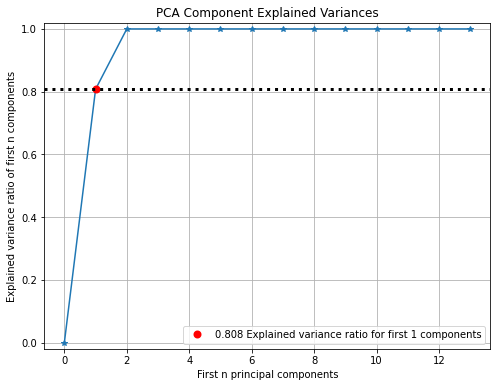

In [ ]:
pca = PCA(random_state=1)
pca.fit(x1)

skplt.decomposition.plot_pca_component_variance(pca, figsize=(8,6));

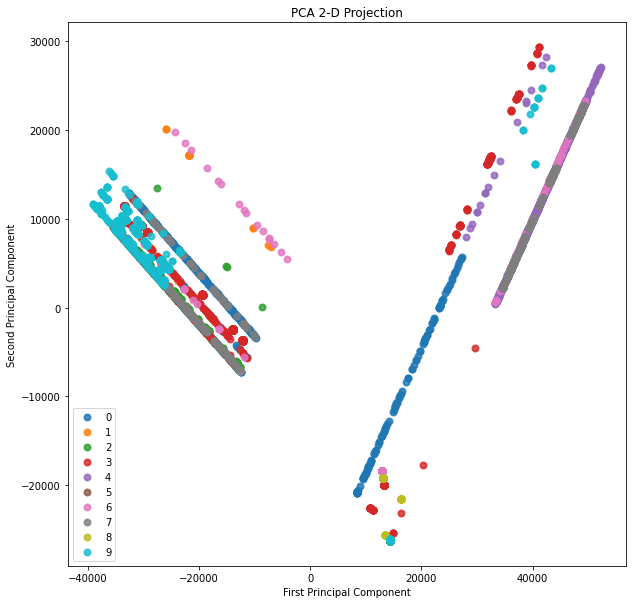

In [ ]:
skplt.decomposition.plot_pca_2d_projection(pca, x1, y1,
                                           figsize=(10,10),
                                           cmap="tab10");

In [ ]:
model5 = DecisionTreeClassifier(criterion = 'entropy')
model5.fit(x2_train, y2_train)
print("Accuracy:",model5.score(x2_test, y2_test)*100)
predictions = svc_model.predict(x1_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y1_test,predictions))
print("Accuracy:",svc_model.score(x1_test, y1_test)*100)

In [ ]:
#DBScan
from sklearn.cluster import DBSCAN
from sklearn import metrics
from numpy import unique

In [ ]:
db = DBSCAN(eps=0.3, min_samples=10).fit(x1)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
  

In [ ]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(labels)
  

[ 0  0  0 ...  0  0 14]


In [ ]:
data = pd.DataFrame(x1)
clusters = pd.DataFrame(db.fit_predict(x1))
data["Cluster"] = clusters

In [ ]:
fig = plt.figure(figsize=(10,10)); ax = fig.add_subplot(111)
scatter = ax.scatter(x1, data,  c=data["Cluster"],s=50)
ax.set_title("DBSCAN Clustering")
ax.set_xlabel("X0")
ax.set_ylabel("X1")
plt.colorbar(scatter)
plt.show()

In [ ]:
nfcapdfilename = pd.read_csv('/content/nfcapdfilename (1).csv')

In [ ]:
nfcapdarr = nfcapdfilename['nfdumpcsv'].unique()

In [ ]:
len(nfcapdarr)

6976

In [ ]:
sys.stdout = open("/content/nfcapd.txt", "a")

for nfcapd in nfcapdarr:
  print("nfdump -r /var/cache/nfdump/{0} -o csv > nfcapd_csv/{0}.csv".format(nfcapd))

In [ ]:
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgbc = XGBClassifier()

In [ ]:
evc = VotingClassifier( estimators= [('knn',knn),('dt',dt),('rf',rf)], voting = 'soft')

In [ ]:
evc.fit(x1,y1)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('dt', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier())],
                 voting='soft')

In [ ]:
evc.score(x2,y2)

0.7723528158511469

In [ ]:
evc.predict(x2)

array([3, 3, 3, ..., 0, 0, 0])

In [ ]:
predEVC = evc.predict(x2)
predevc_df = pd.DataFrame()
predevc_df['Device_EVC'] = predEVC
predevc_df['Device_EVC'] = predevc_df['Device_EVC'].map(labels_dict)
classB['Device_EVC'] = predevc_df['Device_EVC']

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha=1, max_iter=1000)
mlp.fit(x1, y1)

MLPClassifier(alpha=1, max_iter=1000)

In [ ]:
mlp.score(x2,y2)

0.15976348709929633

In [ ]:
# Define estimators
from sklearn.ensemble import StackingClassifier

In [ ]:
estimator_list = [
    ('knn',knn),
    ('rf',rf),
    ('dt',dt) ]

In [ ]:
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

In [ ]:
stack_model.fit(x1, y1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


StackingClassifier(estimators=[('knn', KNeighborsClassifier()),
                               ('rf', RandomForestClassifier()),
                               ('dt', DecisionTreeClassifier())],
                   final_estimator=LogisticRegression())

In [ ]:
stack_model.score(x2,y2)

0.7558767133016121

In [ ]:
predSM = stack_model.predict(x2)
predSM

array([2, 2, 2, ..., 0, 0, 0])

In [ ]:
predSM = stack_model.predict(x2)
predsm_df = pd.DataFrame()
predsm_df['Device_SM'] = predSM
predsm_df['Device_SM'] = predsm_df['Device_SM'].map(labels_dict)
classB['Device_SM'] = predsm_df['Device_SM']

In [ ]:
classB.to_csv('testresult-combined1.csv', index= False)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
clfet = ExtraTreesClassifier(n_estimators=950, random_state=0)

In [ ]:
clfet.fit(x1,y1)

ExtraTreesClassifier(n_estimators=950, random_state=0)

In [ ]:
clfet.score(x2,y2)

0.7746209431148356

In [ ]:
clfet.predict(x2)

array([3, 3, 3, ..., 6, 6, 6])

In [ ]:
result = pd.read_csv('/content/Prediction-Result1.csv', usecols=['sa','pr', 'Device_Src', 'Device_BC', 'Device_ETC', 'Device_BGRF'])

In [ ]:
result.sa.nunique()

11

In [ ]:
for ip in result['sa'].unique():
    # Filter the dataframe using that column and value from the list
    result[result['sa']==ip].to_csv()

In [ ]:
result.shape

(225296, 6)

In [ ]:
resultip = dict(tuple(result.groupby('sa')))

In [ ]:
resultip

{'44.149.43.129':                  sa  pr  ...           Device_ETC          Device_BGRF
 0     44.149.43.129   2  ...  Mikrotik-BGP-Router         Linux-Ubuntu
 1     44.149.43.129   2  ...  Mikrotik-BGP-Router         Linux-Ubuntu
 2     44.149.43.129   2  ...  Mikrotik-BGP-Router         Linux-Ubuntu
 3     44.149.43.129   2  ...  Mikrotik-BGP-Router         Linux-Ubuntu
 4     44.149.43.129   2  ...  Mikrotik-BGP-Router         Linux-Ubuntu
 ...             ...  ..  ...                  ...                  ...
 7190  44.149.43.129   2  ...  Mikrotik-BGP-Router  Mikrotik-BGP-Router
 7191  44.149.43.129   2  ...  Mikrotik-BGP-Router  Mikrotik-BGP-Router
 7192  44.149.43.129   2  ...  Mikrotik-BGP-Router  Mikrotik-BGP-Router
 7193  44.149.43.129   2  ...  Mikrotik-BGP-Router  Mikrotik-BGP-Router
 7194  44.149.43.129   2  ...  Mikrotik-BGP-Router  Mikrotik-BGP-Router
 
 [7195 rows x 6 columns],
 '44.149.43.130':                   sa  pr  ...       Device_ETC      Device_BGRF
 7195   4